# **Setup and Data Loading**

**Load the dataset, and Inspect its structure.**

* Loading the dataset from the given source.
* Displaying the first few rows to understand its structure.



In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For statistical data visualization

# Load the dataset from the provided link
url = "https://raw.githubusercontent.com/SiddardhaShayini/Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/refs/heads/siddardha-shayini/complete_dataset.csv"
df = pd.read_csv(url)

# Display the first few rows to understand the dataset structure
df.head()


date      demand        RRP  demand_pos_RRP  RRP_positive  \
0  2015-01-01   99635.030  25.633696       97319.240     26.415953   
1  2015-01-02  129606.010  33.138988      121082.015     38.837661   
2  2015-01-03  142300.540  34.564855      142300.540     34.564855   
3  2015-01-04  104330.715  25.005560      104330.715     25.005560   
4  2015-01-05  118132.200  26.724176      118132.200     26.724176   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0        2315.790     -7.240000         0.020833             13.3   
1        8523.995    -47.809777         0.062500             15.4   
2           0.000      0.000000         0.000000             20.0   
3           0.000      0.000000         0.000000             16.3   
4           0.000      0.000000         0.000000             15.0   

   max_temperature  solar_exposure  rainfall school_day holiday  
0             26.9            23.6       0.0          N       Y  
1             38.8            26.8       0.0          N       N  
2             38.2            26.5       0.0          N       N  
3             21.4            25.2       4.2          N       N  
4             22.0            30.7       0.0          N       N

## **Column Overview:**
The dataset consists of 14 columns:

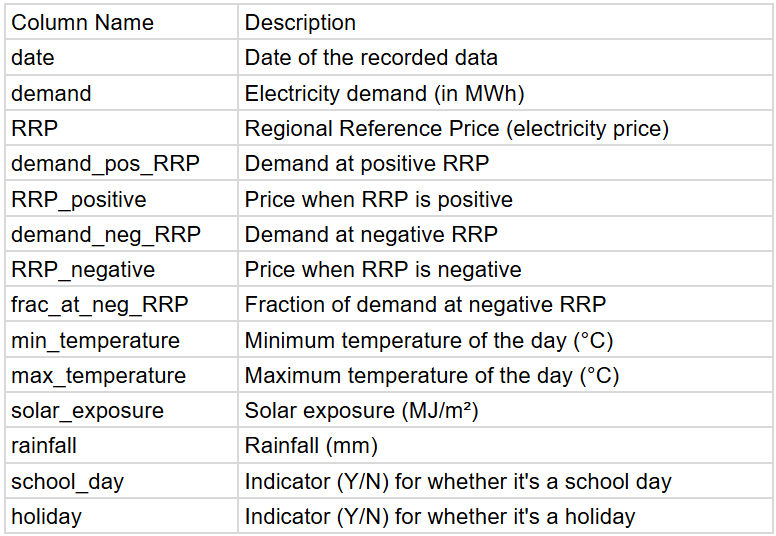

## **Data Types & Formats:**
* The date column appears to be in YYYY-MM-DD format (good for time-series analysis).
* school_day and holiday are categorical (Y/N values).
* Other columns are numerical (floating-point or integer values).

## **Initial Observations from Data Preview:**
* Demand (demand) fluctuates:
 * 99,635 MWh (Jan 1) → 142,300 MWh (Jan 3) → 104,330 MWh (Jan 4).
 * There is significant variation, which suggests demand fluctuates daily.

* Electricity Price (RRP) Variability:
 * Jan 1: 25.63
 * Jan 2: 33.13
 * Jan 3: 34.56
 * Prices are fluctuating, possibly due to demand or external factors like weather.

* Negative Pricing (RRP_negative) Exists:
 * On Jan 2, RRP_negative = -47.80 → This means electricity prices sometimes go negative.
 * This will be important for revenue and cost optimization analysis.

* Weather Variables Show Trends:
 * Min Temperature: Varies from 13.3°C to 20°C in just a few days.
 * Max Temperature: Ranges from 21.4°C to 38.8°C.
 * Solar Exposure & Rainfall: High solar exposure (23.6 MJ/m²) but varying rainfall (some days 0 mm, some days 4.2 mm).
 * These could impact electricity demand.

* Special Events (Holidays & School Days):
 * Jan 1: Holiday (Y), possibly affecting demand.
 * Other days are not holidays (N).
 * This suggests that public holidays and school days could be influencing electricity demand.

The dataset structure is correct and well-formatted.

Demand and price fluctuations are visible, indicating possible trends.

Negative electricity prices occur on some days.

Weather conditions (temperature, solar exposure, rainfall) could be linked to demand variations.

Holidays and school days might impact electricity consumption.

# **Data Exploration & Cleaning**

We need to clean and preprocess the data to ensure accuracy.

* Check dataset info.
* Handle missing values.
* Detect and remove noise.
* Identify and eliminate redundancy.
* Check for duplicates and remove them.

In [2]:
import missingno as msno  # For visualizing missing values
# Check dataset info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


### **Analysis of Dataset Info**
1. Total Records & Columns:
 * The dataset contains 2,106 entries with 14 columns.

2. Data Types:
 * Numerical Columns (11): float64 (e.g., demand, RRP, min_temperature, etc).
 * Categorical Columns (3): object (date, school_day, holiday).

3. Missing Values:
 * solar_exposure: 1 missing value (2105 non-null).
 * rainfall: 3 missing values (2103 non-null).

4. Date Column:
 * Stored as object, needs conversion to datetime for time-series analysis.


In [3]:
# Check for missing values (visualizing using missingno)
print("\n Missing Values Count:")
print(df.isnull().sum())


 Missing Values Count:
date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64


### **Analysis of Missing Values**
* The dataset has 14 columns, with only 2 columns containing missing values.
* solar_exposure has 1 missing value → This could affect weather impact analysis.
* rainfall has 3 missing values → This might impact weather-related demand forecasting.
* All other columns have 0 missing values.

<Figure size 1000x500 with 0 Axes>

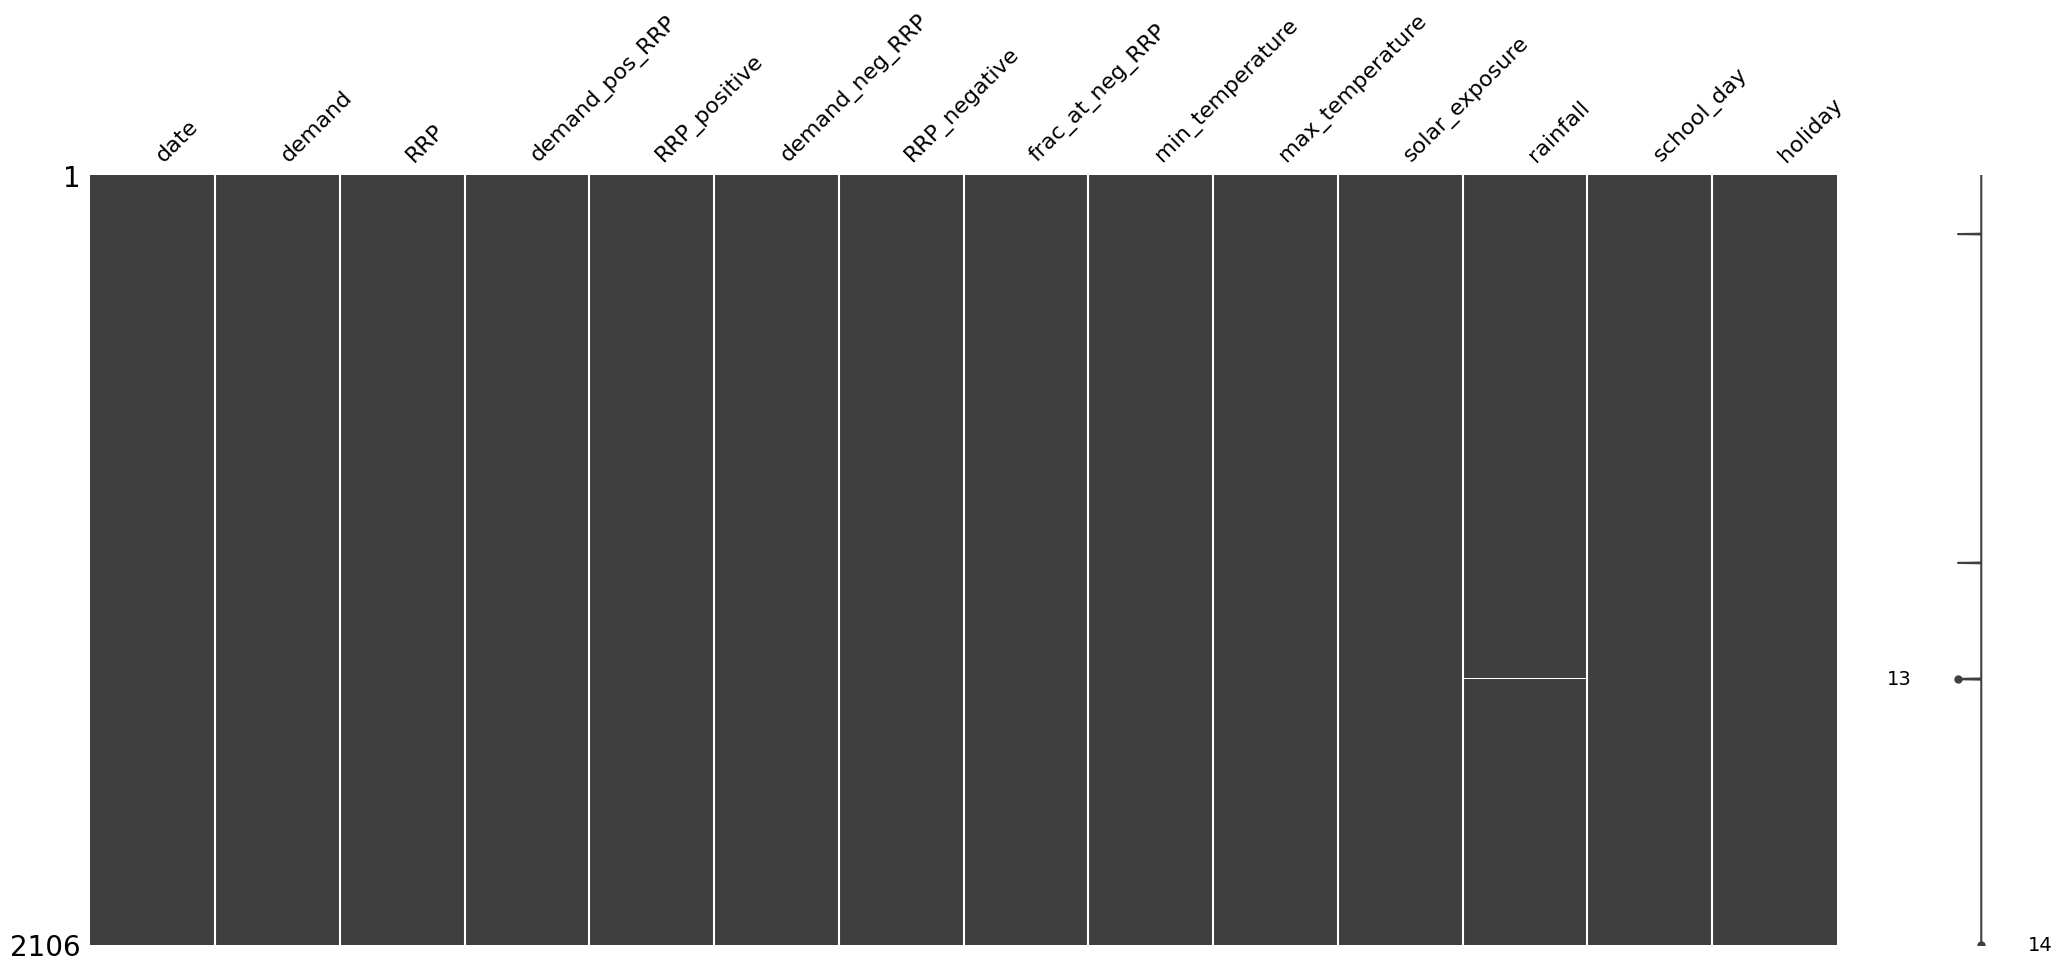

In [4]:
plt.figure(figsize=(10,5))
msno.matrix(df)  # Visual representation of missing values
plt.show()

The plotted matrix visually represents the missing values in the dataset using the missingno library.
* Complete Columns: Most columns, such as date, demand, RRP, and others, have complete data.
* Missing Values: The columns solar_exposure and rainfall have some missing values.
* Data Overview: The plot shows a total of 2,106 observations with 13 missing values.

In [5]:
# Handling missing values (Only for numeric columns)
numeric_cols = df.select_dtypes(include=['number']).columns  # Select only numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())  # Fill missing values with median

# Verify missing values are handled
print("\n After Handling Missing Values:")
print(df.isnull().sum())


 After Handling Missing Values:
date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64


<Figure size 1000x500 with 0 Axes>

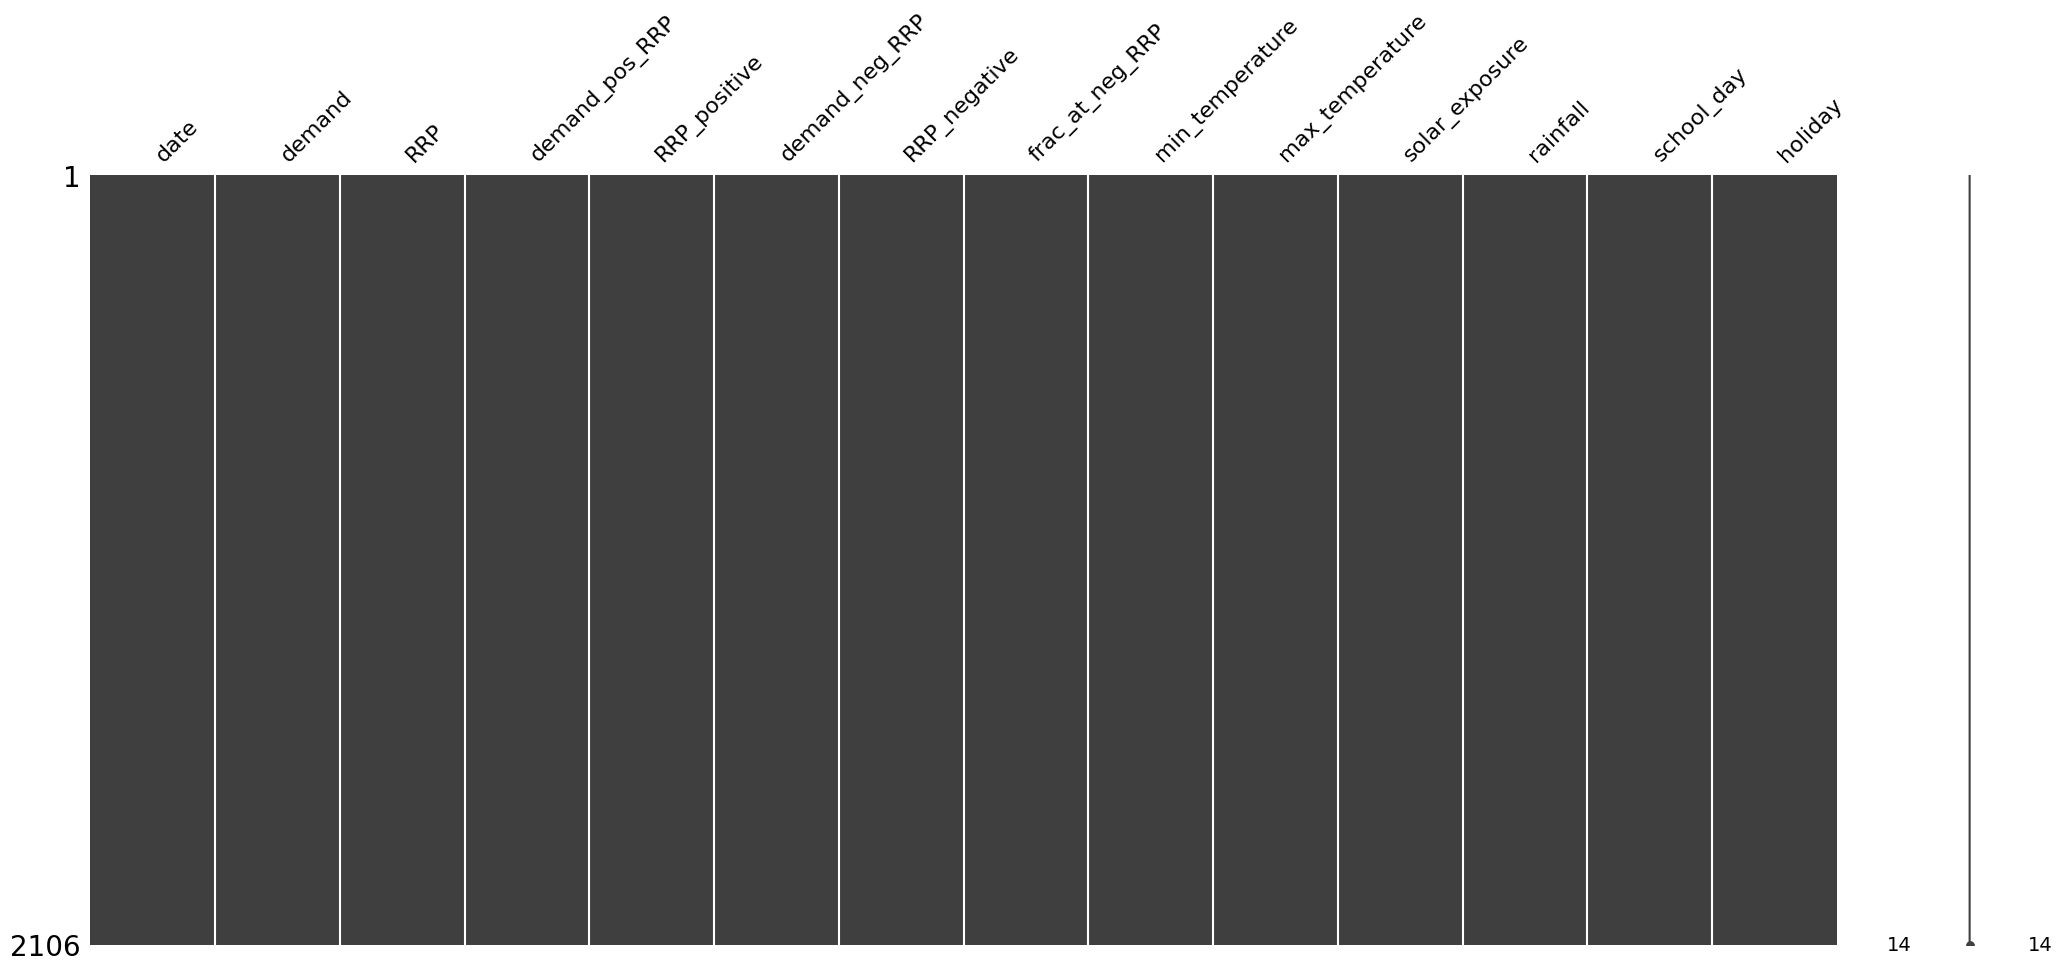

In [6]:
plt.figure(figsize=(10,5))
msno.matrix(df)  # Visual representation of missing values
plt.show()

* No missing values are present in the dataset after handling.

* Dataset is now clean and ready for further preprocessing.

### **Noise Detection & Data Cleaning**

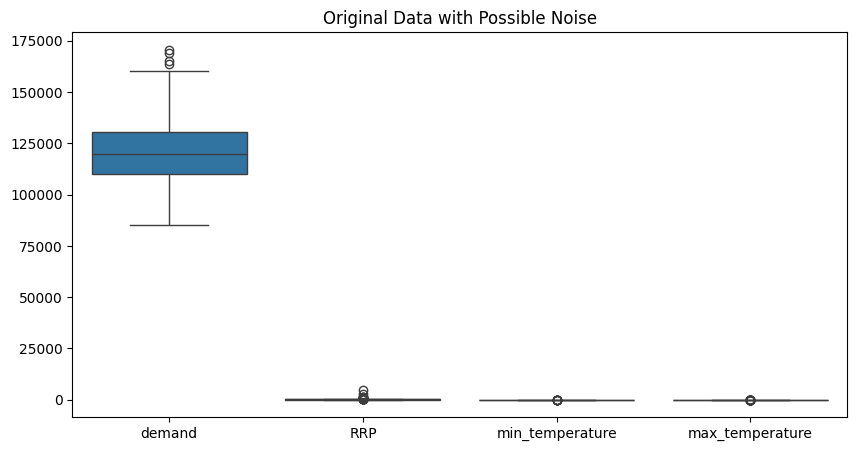

In [7]:
# Noise Detection (Displaying original vs cleaned data)
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['demand', 'RRP', 'min_temperature', 'max_temperature']])
plt.title("Original Data with Possible Noise")
plt.show()

The boxplot visually represents the distribution of the following variables: demand, RRP, min_temperature, and max_temperature.

 * Demand: Shows significant variability with many outliers above 150,000, indicating potential noise.

 * RRP, Min Temperature, Max Temperature: These variables have much smaller ranges and tightly clustered data with some outliers.

This plot highlights possible noise in the demand data, which may require further cleaning or analysis.

Apply Interquartile Range (IQR)  for numeric columns to detect and filter outliers.

In [8]:
# Select only numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=['number']).columns

# Compute IQR only for numeric columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Create a filtered version of numeric data
df_filtered = df[numeric_cols][(df[numeric_cols] >= (Q1 - 1.5 * IQR)) & (df[numeric_cols] <= (Q3 + 1.5 * IQR))]

# Preserve non-numeric columns (`date`, `school_day`, `holiday`)
df_cleaned = df[['date', 'school_day', 'holiday']].join(df_filtered)

# Verify NaN values after fixing
print("\n Missing Values After Fixing:")
print(df_cleaned.isna().sum())



 Missing Values After Fixing:
date                 0
school_day           0
holiday              0
demand               4
RRP                 28
demand_pos_RRP      17
RRP_positive        28
demand_neg_RRP     191
RRP_negative       181
frac_at_neg_RRP    191
min_temperature      8
max_temperature     40
solar_exposure       0
rainfall           347
dtype: int64


In [9]:
# Fill missing values in numeric columns with median
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns  # Select only numeric columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())

# Verify missing values after filling
print("\n Missing Values After Filling:")
print(df_cleaned.isna().sum())

# Final Dataset Info Check
print("\n Final Dataset Info:")
df_cleaned.info()



 Missing Values After Filling:
date               0
school_day         0
holiday            0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
dtype: int64

 Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   school_day       2106 non-null   object 
 2   holiday          2106 non-null   object 
 3   demand           2106 non-null   float64
 4   RRP              2106 non-null   float64
 5   demand_pos_RRP   2106 non-null   float64
 6   RRP_positive     2106 non-null   float64
 7   demand_neg_RRP   2106 non-null   float64
 8   RRP_negative     2106 non-null   float64
 9   frac_at_neg_RRP  2106

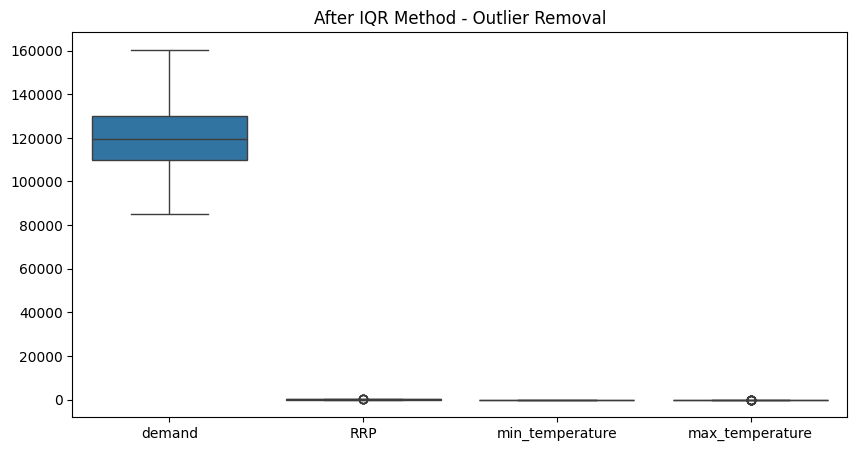

In [10]:
# Visualize cleaned data after IQR method
plt.figure(figsize=(10,5))
sns.boxplot(data=df_cleaned[['demand', 'RRP', 'min_temperature', 'max_temperature']])
plt.title("After IQR Method - Outlier Removal")
plt.show()

The boxplot titled represents the distribution of demand, RRP, min_temperature, and max_temperature after removing outliers using the IQR method.

 * Demand: Now shows a more compact range without extreme outliers, indicating successful noise removal.

 * RRP, Min Temperature, Max Temperature: Display a more consistent range, highlighting fewer variability and outliers.

In [11]:
# Check for duplicate values
duplicates = df_cleaned.duplicated().sum()
print(f"\n Number of Duplicate Rows: {duplicates}")


 Number of Duplicate Rows: 0


The output shows that there are no duplicate rows in the cleaned dataset (Number of Duplicate Rows: 0). This indicates that the data is unique and doesn't contain any repeated entries, which is good for ensuring the quality and reliability for analysis.

# **Exploratory Data Analysis (EDA)**

### **Demand & Price Analysis**
Visualize daily electricity demand trends.

Analyze the relationship between demand and electricity price (RRP).

In [12]:
# Sort data by 'date' (string)
df_cleaned = df_cleaned.sort_values(by='date')

# Reduce X-axis labels for better visibility
sample_interval = 50  # Adjust to control label density
date_labels = df_cleaned['date'][::sample_interval]  # Select every 50th date

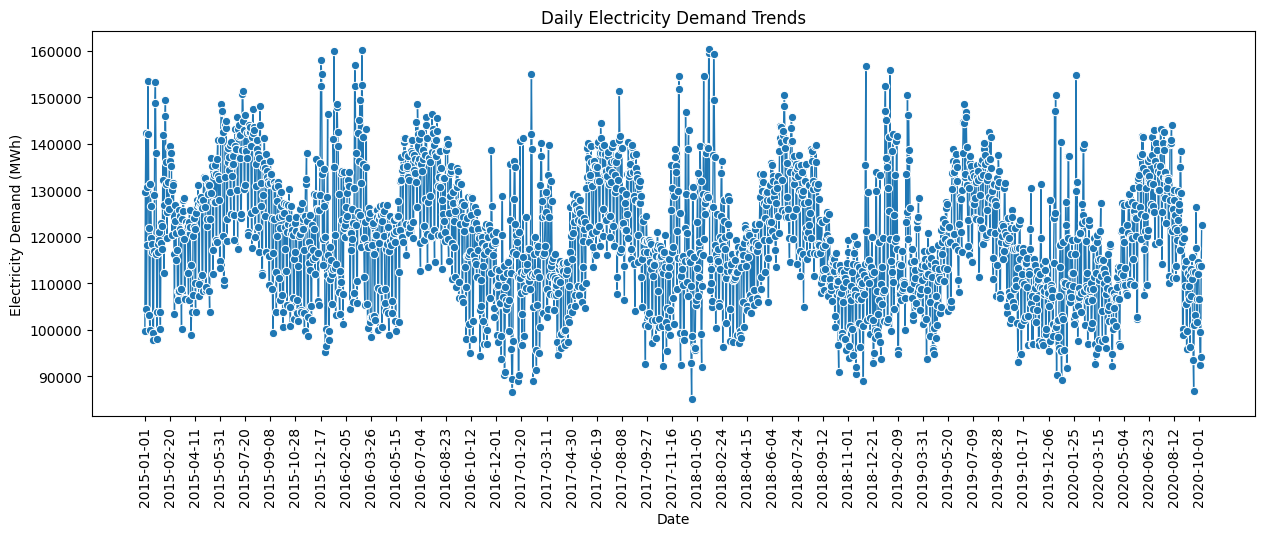

In [13]:
# Daily Electricity Demand Trends
plt.figure(figsize=(15,5))
sns.lineplot(data=df_cleaned, x='date', y='demand', marker='o', linewidth=1)
plt.xticks(ticks=range(0, len(df_cleaned), sample_interval), labels=date_labels, rotation=90)
plt.title("Daily Electricity Demand Trends")
plt.xlabel("Date")
plt.ylabel("Electricity Demand (MWh)")
plt.show()

X-Axis: Date (from January 1, 2015, to October 1, 2020).

Y-Axis: Electricity Demand (in MWh).

The plot shows a line connecting data points, marked with circles, indicating the electricity demand trends over the specified time period.

Labels on the x-axis are reduced for clarity by plotting every 50th date.

**Observations:**

* The plot reveals clear seasonal patterns in electricity demand, with noticeable peaks and troughs.
* Higher demand periods likely correspond to seasonal changes, such as summer and winter, when electricity usage typically increases due to heating and cooling needs.
* The general trend appears to have multiple fluctuations, suggesting possible variations in demand based on factors like weather conditions, holidays, and other significant events.

The plot effectively represents the daily electricity demand trends and can be useful for understanding how demand fluctuates over time, which is essential for energy planning and management.

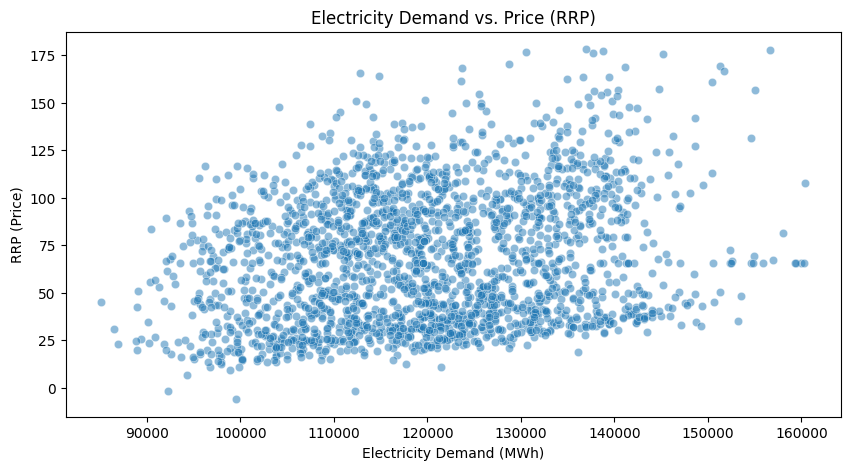

In [14]:
# Relationship Between Electricity Demand and Price (RRP)
plt.figure(figsize=(10,5))
sns.scatterplot(data=df_cleaned, x='demand', y='RRP', alpha=0.5)
plt.title("Electricity Demand vs. Price (RRP)")
plt.xlabel("Electricity Demand (MWh)")
plt.ylabel("RRP (Price)")
plt.show()

X-Axis: Electricity Demand (MWh) ranging from approximately 85,000 to 160,000 MWh.

Y-Axis: RRP (Price) ranging from 0 to 175.

The plot is a scatter plot with each point representing a data point that shows the relationship between electricity demand (x-axis) and price (y-axis).

The scatter points are semi-transparent (alpha=0.5), which allows for better visualization of data density.

**Observations:**

* There is a noticeable concentration of data points between 100,000 and 130,000 MWh for demand and between 25 and 100 for price.
* A general trend can be observed, suggesting a weak positive correlation between electricity demand and price. As the demand increases, the price tends to increase as well.
* Despite the positive correlation, there is significant variability in the data, indicating that other factors may also influence the price besides demand.

The scatter plot effectively illustrates the relationship between electricity demand and price (RRP). While a weak positive correlation is observed, the variability suggests that multiple factors could be affecting the price.

In [15]:
# Correlation Between Demand & RRP
correlation = df_cleaned[['demand', 'RRP']].corr().iloc[0,1]
print(f"\n Correlation between Electricity Demand and Price (RRP): {correlation:.4f}")


 Correlation between Electricity Demand and Price (RRP): 0.2255


Indicates a weak positive correlation.

As electricity demand increases, price tends to increase slightly.

The relationship between demand and price is weak, suggesting other factors also influence electricity pricing.

### **Weather Impact Analysis**

In [16]:
# Extract Month from `date` string
df_cleaned['Month'] = df_cleaned['date'].str[5:7]  # Extract month as string

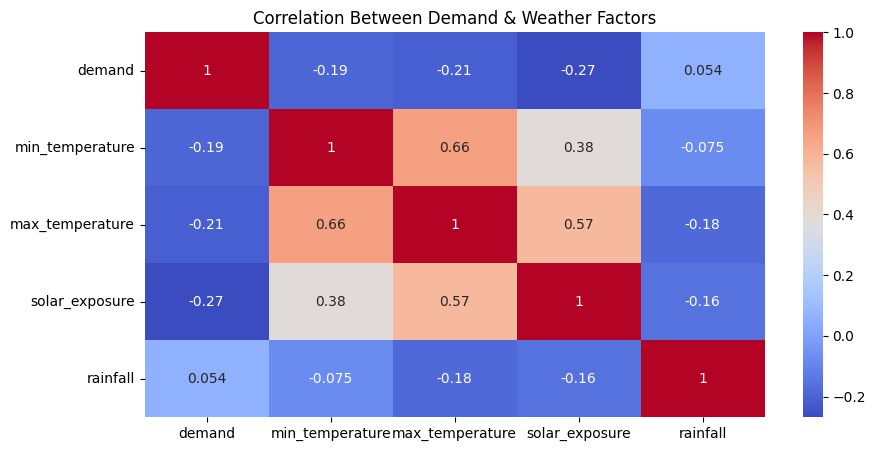

In [17]:
# Correlation Between Demand & Weather Factors
plt.figure(figsize=(10,5))
sns.heatmap(df_cleaned[['demand', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Demand & Weather Factors")
plt.show()

Electricity Demand:
* Negative correlation with Minimum Temperature (-0.19), Maximum Temperature (-0.21), and Solar Exposure (-0.27).
* Positive correlation with Rainfall (0.054).

Higher demand during colder and less sunny days.

Rainfall has minimal impact on electricity demand.

Conclusion: Temperature and solar exposure significantly affect electricity demand, useful for predicting and optimizing energy resources.

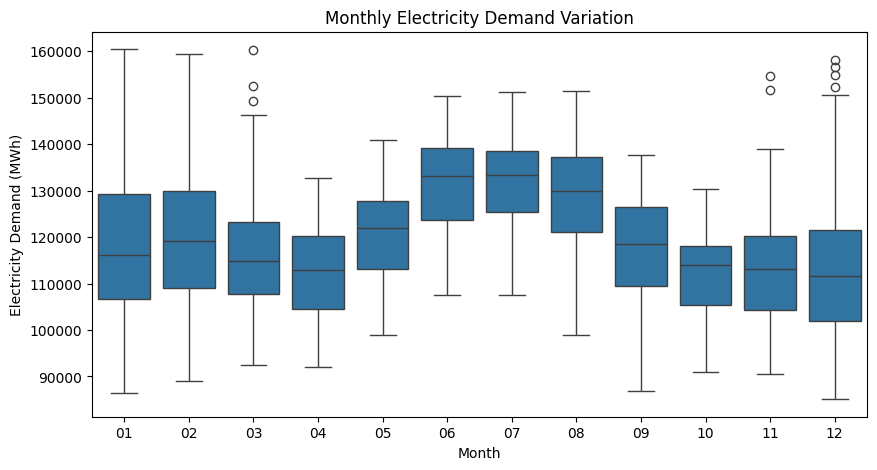

In [18]:
# Monthly Demand Variation
plt.figure(figsize=(10,5))
sns.boxplot(data=df_cleaned, x='Month', y='demand')
plt.title("Monthly Electricity Demand Variation")
plt.xlabel("Month")
plt.ylabel("Electricity Demand (MWh)")
plt.show()

Box Plot showing monthly electricity demand (MWh) from January (01) to December (12).

Seasonal Trends: Higher demand during winter (January, February, December) and summer (June, July, August).

Fluctuations: Noticeable variations within each month.

Outliers: Significant demand spikes in March, November, and December.

Highlights periods of higher and lower demand.

Useful for planning and managing energy resources effectively.

### **Operational Efficiency & Special Events**

Check how holidays and school days impact demand.

Identify unusual demand drops/spikes due to special events.

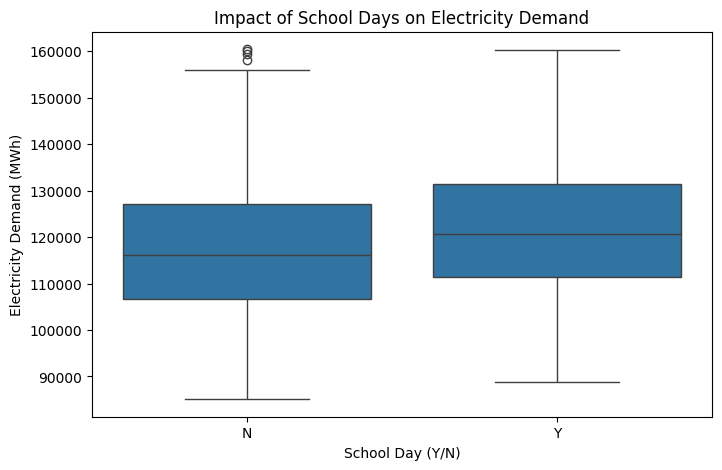

In [19]:
# Compare Demand on School Days vs. Non-School Days
plt.figure(figsize=(8,5))
sns.boxplot(data=df_cleaned, x='school_day', y='demand')
plt.title("Impact of School Days on Electricity Demand")
plt.xlabel("School Day (Y/N)")
plt.ylabel("Electricity Demand (MWh)")
plt.show()

Non-School Days (N):

 * Median demand slightly above 120,000 MWh.

 * Demand ranges from approximately 90,000 to 150,000 MWh, with some outliers above 150,000 MWh.

School Days (Y):

 * Median demand slightly below 130,000 MWh.

 * Demand ranges from approximately 90,000 to 160,000 MWh, with no outliers.

School days have higher median electricity demand compared to non-school days.

Wider range of demand on school days.

Conclusion: This plot highlights that electricity demand tends to be higher on school days, which is essential for energy management and planning.

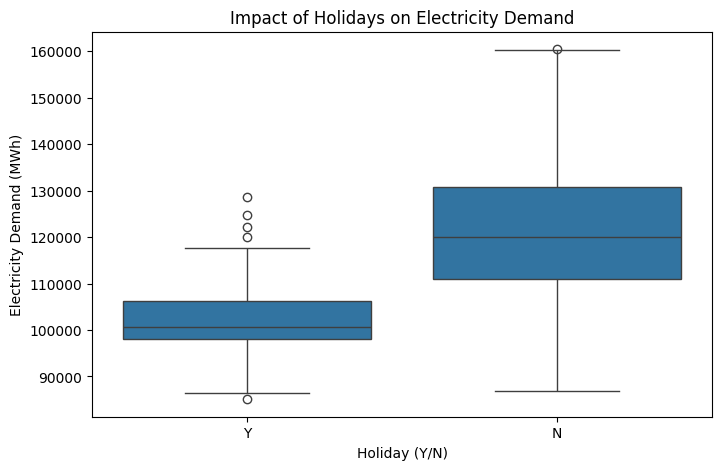

In [20]:
# Compare Demand on Holidays vs. Non-Holidays
plt.figure(figsize=(8,5))
sns.boxplot(data=df_cleaned, x='holiday', y='demand')
plt.title("Impact of Holidays on Electricity Demand")
plt.xlabel("Holiday (Y/N)")
plt.ylabel("Electricity Demand (MWh)")
plt.show()

Holidays (Y):

 * Median demand around 100,000 MWh.

 * Narrow range from approximately 90,000 to 120,000 MWh.

 * Outliers above 120,000 MWh.

Non-Holidays (N):

 * Median demand around 130,000 MWh.

 * Wider range from approximately 90,000 to 160,000 MWh.

 * Outlier above 160,000 MWh.

Electricity demand tends to be lower on holidays compared to non-holidays.

Narrower demand range on holidays.

Conclusion: Electricity demand is generally lower and more consistent on holidays, highlighting a significant difference in consumption patterns compared to non-holidays.



### **Anomaly Detection & Outlier Analysis**

Identify unusual spikes or drops in demand.

Detect extreme values using boxplots.

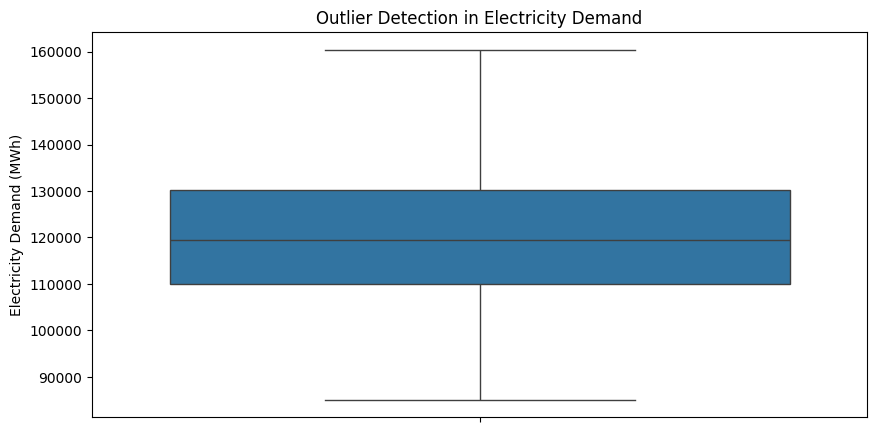

In [21]:
# Detect Outliers in Demand Using Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=df_cleaned, y='demand')
plt.title("Outlier Detection in Electricity Demand")
plt.ylabel("Electricity Demand (MWh)")
plt.show()

Central Tendency: The median electricity demand is around 122,000 MWh.

Variability: The interquartile range (IQR) is from approximately 115,000 MWh to 130,000 MWh.

Range: The whiskers extend from approximately 90,000 MWh to 160,000 MWh.

Outliers: No apparent outliers beyond the whiskers.

This plot visually summarizes the central tendency and variability of electricity demand data.

The absence of outliers suggests that the data is relatively consistent within the observed range.

Conclusion: The box plot effectively highlights the distribution of electricity demand, providing valuable insights for energy management and planning.

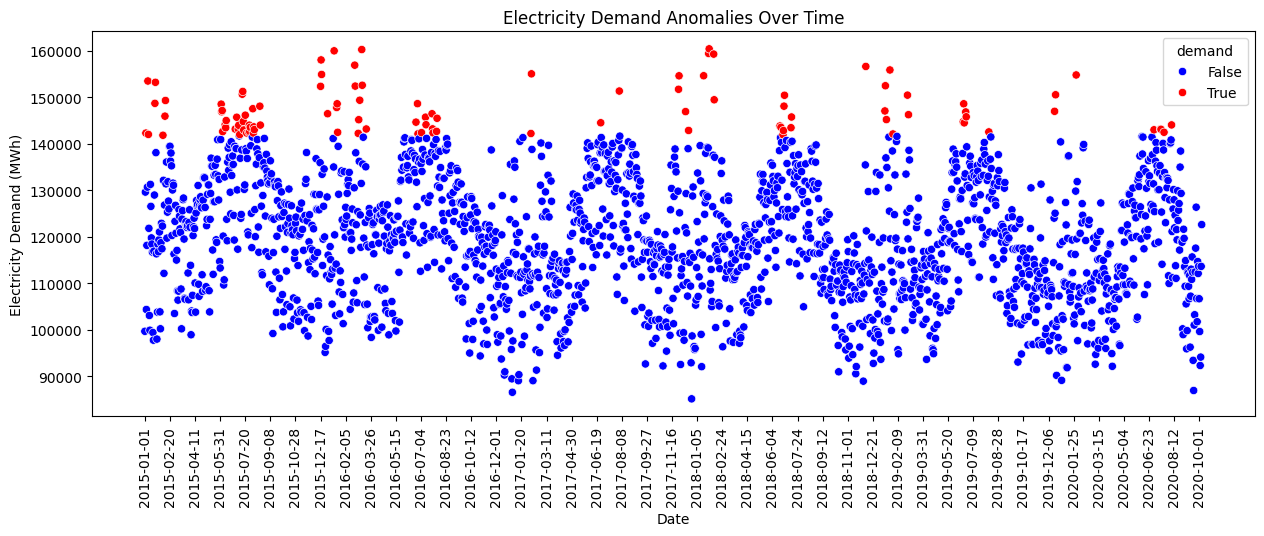

In [22]:
# Detect Demand Anomalies Over Time
plt.figure(figsize=(15,5))
sns.scatterplot(data=df_cleaned, x='date', y='demand', hue=(df_cleaned['demand'] > df_cleaned['demand'].quantile(0.95)), palette={True: 'red', False: 'blue'})
plt.xticks(ticks=range(0, len(df_cleaned), sample_interval), labels=date_labels, rotation=90)
plt.title("Electricity Demand Anomalies Over Time")
plt.xlabel("Date")
plt.ylabel("Electricity Demand (MWh)")
plt.show()

Normal Demand: Majority of points are blue, indicating normal demand patterns.

Anomalies: Red points indicate occasional spikes in demand.

Conclusion:
Identifies periods of unusual electricity consumption, useful for energy management and planning.

### **Revenue & Cost Optimization**

Analyze periods with negative or low RRP (electricity price).

Suggest cost-saving strategies based on price fluctuations.

In [23]:
# Count Negative RRP Occurrences
negative_rrp_count = (df_cleaned['RRP'] < 0).sum()
print(f"\n Number of Days with Negative RRP: {negative_rrp_count}")


 Number of Days with Negative RRP: 3


Negative RRP Days: 3 days have negative RRP (Regional Reference Price).

Negative RRP occurrences are rare, highlighting unusual market conditions on these days.

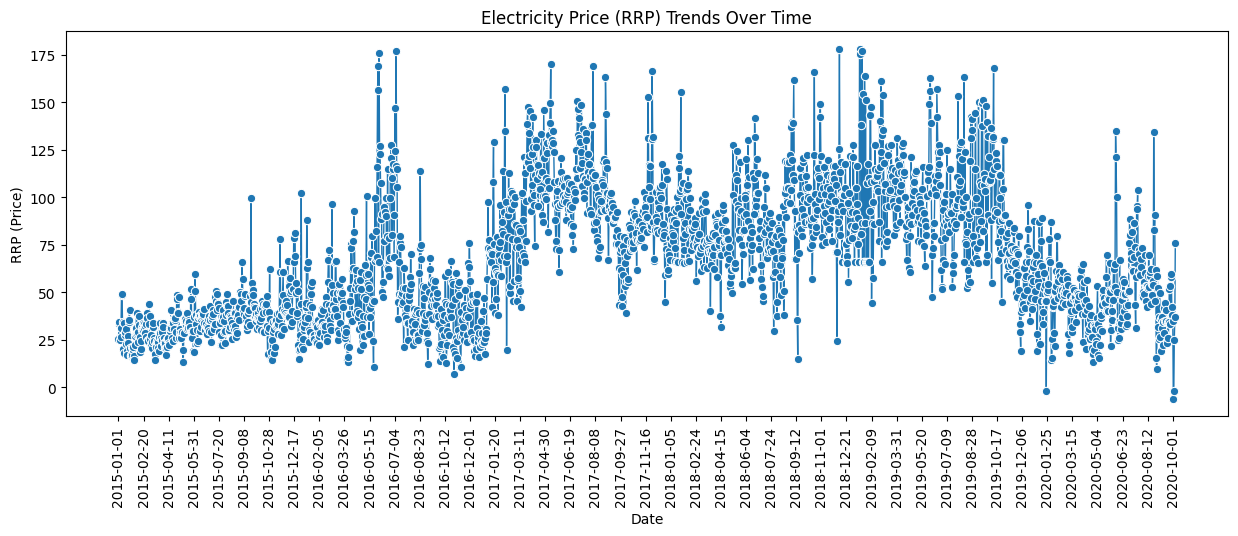

In [24]:
# Visualize RRP Over Time
plt.figure(figsize=(15,5))
sns.lineplot(data=df_cleaned, x='date', y='RRP', marker='o', linewidth=1)
plt.xticks(ticks=range(0, len(df_cleaned), sample_interval), labels=date_labels, rotation=90)
plt.title("Electricity Price (RRP) Trends Over Time")
plt.xlabel("Date")
plt.ylabel("RRP (Price)")
plt.show()

Volatility: Significant fluctuations in electricity prices.

Peaks: Notable price peaks around mid-2016 and mid-2019.

Highlights the volatility and trends in electricity prices, useful for understanding market dynamics and forecasting.



### **Advanced Temporal Feature Analysis**
Extract day of the week and seasonal patterns from date.

Checking cyclic demand variations over time.

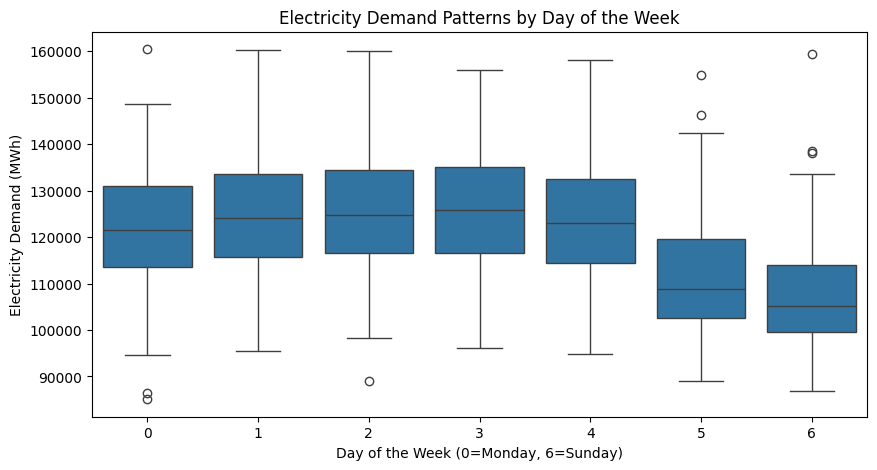

In [25]:
# Extract Day of the Week from `date` string
df_cleaned['DayOfWeek'] = df_cleaned['date'].apply(lambda x: pd.to_datetime(x).dayofweek)

# Demand Patterns by Day of the Week
plt.figure(figsize=(10,5))
sns.boxplot(data=df_cleaned, x='DayOfWeek', y='demand')
plt.title("Electricity Demand Patterns by Day of the Week")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Electricity Demand (MWh)")
plt.show()


Consistent Demand: Monday to Thursday have relatively consistent median demands.

Lower Demand: Demand drops on Friday, Saturday, and Sunday, with the lowest on Sunday.

Variability: More variability on Monday and Tuesday.

Weekends have lower and more variable electricity demand compared to weekdays.



## **Visualizations**

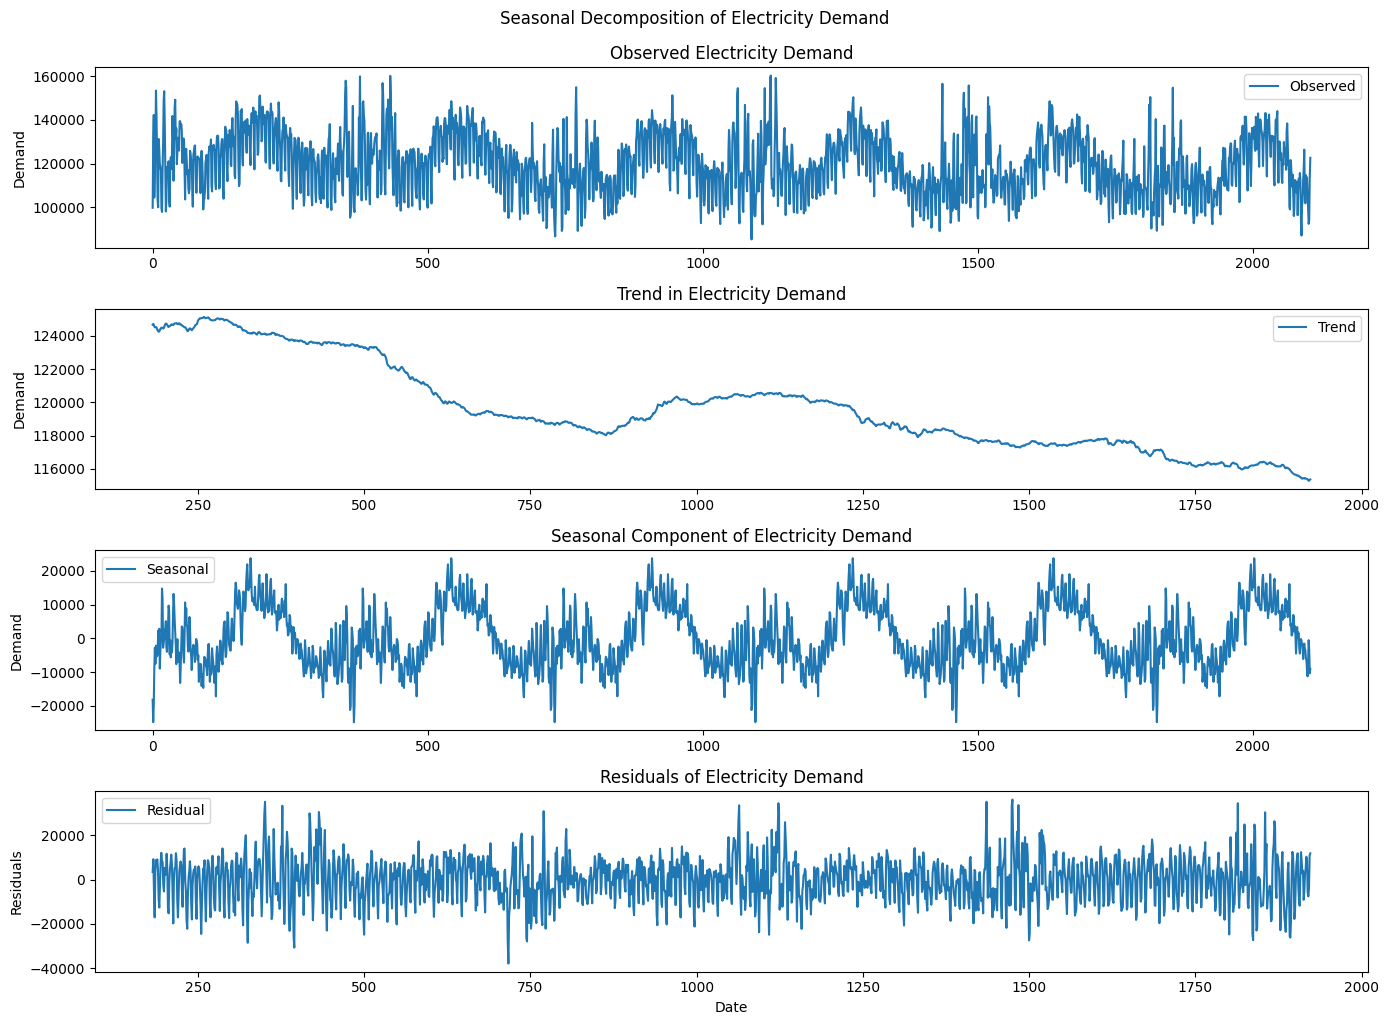

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series
decomposition = seasonal_decompose(df_cleaned['demand'], period=365, model='additive')

# Plot
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.title('Observed Electricity Demand')
plt.ylabel('Demand')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend in Electricity Demand')
plt.ylabel('Demand')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.title('Seasonal Component of Electricity Demand')
plt.ylabel('Demand')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.title('Residuals of Electricity Demand')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.suptitle('Seasonal Decomposition of Electricity Demand', y=1.02)
plt.show()

### Seasonal Decomposition Analysis

1. **Observed Electricity Demand**:
   - **Description**: This plot shows the raw observed data of electricity demand over time.
   - **Analysis**: The demand fluctuates significantly, indicating periods of high and low consumption. There might be visible seasonal trends, but they are mixed with overall demand variations. This plot is essential for understanding the actual electricity demand patterns.

2. **Trend in Electricity Demand**:
   - **Description**: This plot illustrates the trend component, highlighting long-term movements in electricity demand.
   - **Analysis**: The trend component reveals a general decline in electricity demand over the observed period. The downward trend might indicate changes in consumer behavior, energy efficiency improvements, or economic factors affecting overall electricity consumption. Recognizing this trend is crucial for long-term strategic planning and policy-making.

3. **Seasonal Component of Electricity Demand**:
   - **Description**: This plot displays the seasonal component, capturing repeating patterns or cycles within the data.
   - **Analysis**: The seasonal component oscillates regularly, indicating that electricity demand has predictable seasonal fluctuations. These patterns could be due to changes in weather, holidays, or other cyclical factors influencing electricity consumption. Understanding these seasonal variations helps in forecasting and managing peak load periods.

4. **Residuals of Electricity Demand**:
   - **Description**: This plot shows the residuals, which represent the remaining variations after removing the trend and seasonal components.
   - **Analysis**: The residuals fluctuate around zero, indicating that most of the systematic patterns in the data have been captured by the trend and seasonal components. However, some fluctuations suggest the presence of irregular factors or noise. Analyzing residuals helps identify anomalies and improve forecasting accuracy by addressing unexplained variations.

<ipython-input-27-581dc07be1c1>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned['demand'], shade=True)


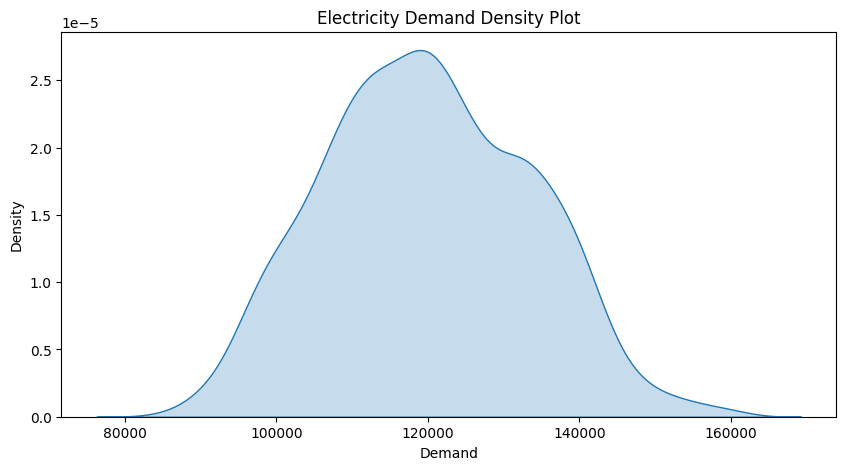

In [27]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df_cleaned['demand'], shade=True)
plt.title('Electricity Demand Density Plot')
plt.xlabel('Demand')
plt.ylabel('Density')
plt.show()


1. **Peak Demand**: The plot shows a single peak around 120,000 demand units, indicating this is the most common electricity demand level.
2. **Distribution**: The density plot is symmetrical, suggesting that the distribution of electricity demand is approximately normal.
3. **Spread**: The demand ranges from around 80,000 to 160,000 units, showing the variability in electricity consumption.

This plot effectively demonstrates the typical electricity demand and its variability, which can be useful for understanding overall consumption patterns.

<ipython-input-28-958fcffed786>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-28-958fcffed786>:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


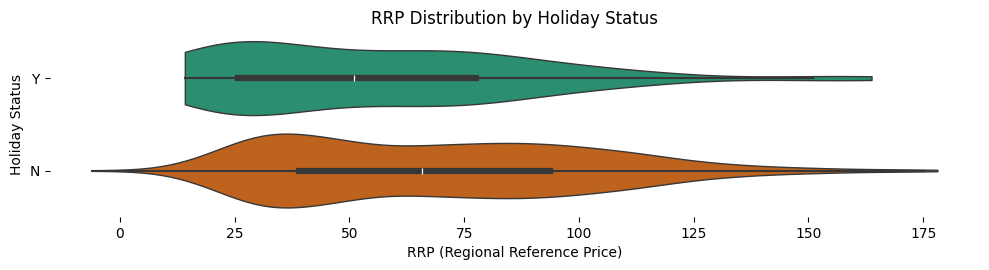

In [28]:

# Set figure size
figsize = (12, 1.2 * len(df_cleaned['holiday'].unique()))
plt.figure(figsize=figsize)

# Create violin plot with additional customizations
sns.violinplot(
    data=df_cleaned,
    x='RRP',
    y='holiday',
    inner='box',
    palette='Dark2',
    scale='width',
    linewidth=1,
    cut=0
)

# Add plot title and labels
plt.title("RRP Distribution by Holiday Status")
plt.xlabel("RRP (Regional Reference Price)")
plt.ylabel("Holiday Status")

# Despine the plot for a cleaner look
sns.despine(top=True, right=True, bottom=True, left=True)

# Show the plot
plt.show()


- **RRP Distribution**:
  - The Regional Reference Price (RRP) ranges from 0 to approximately 175.
  - The distribution for non-holidays (N) is wider and more spread out compared to holidays (Y).

- **Median RRP**:
  - The median RRP for holidays is higher than for non-holidays, indicating higher prices on holidays.

- **Comparison**:
  - The plot visually compares RRP distribution between holidays and non-holidays, highlighting differences in price behavior.


<ipython-input-29-6e7e839e9c35>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-29-6e7e839e9c35>:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


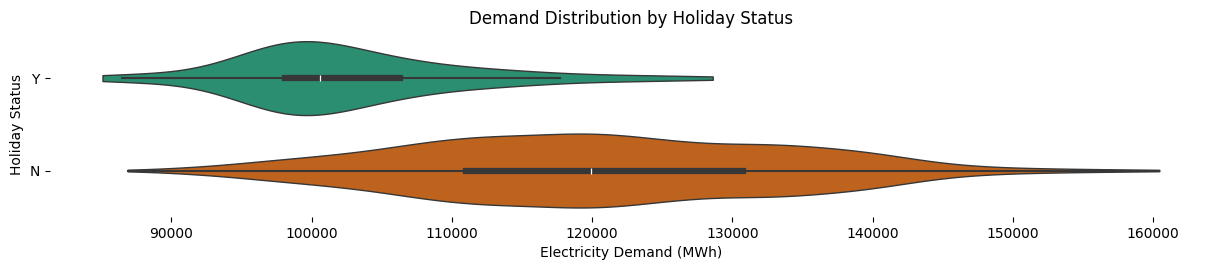

In [29]:

# Set figure size
figsize = (15, 1.2 * len(df_cleaned['holiday'].unique()))
plt.figure(figsize=figsize)

# Create violin plot with additional customizations
sns.violinplot(
    data=df_cleaned,
    x='demand',
    y='holiday',
    inner='box',
    palette='Dark2',
    scale='width',
    linewidth=1,
    cut=0
)

# Add plot title and labels
plt.title("Demand Distribution by Holiday Status")
plt.xlabel("Electricity Demand (MWh)")
plt.ylabel("Holiday Status")

# Despine the plot for a cleaner look
sns.despine(top=True, right=True, bottom=True, left=True)

# Show the plot
plt.show()


- **Electricity Demand Distribution**:
  - The demand ranges from 90,000 to 160,000 MWh.
  - On holidays (Y), the demand is generally lower and more concentrated around 100,000 MWh.
  - On non-holidays (N), the demand is higher and more spread out, with a wider range of values.

- **Median Demand**:
  - The median demand on holidays is lower compared to non-holidays.

- **Visual Insight**:
  - The plot clearly demonstrates that electricity demand is higher and more variable on non-holidays compared to holidays.



### **Conclusion**
**Higher RRP on Holidays:** The median RRP is higher on holidays, indicating that electricity prices tend to be higher during holidays.

**Lower Electricity Demand on Holidays:** Electricity demand is generally lower and more concentrated on holidays, whereas on non-holidays, demand is higher and more variable.

Overall the data suggests that holidays are associated with lower electricity demand but higher prices.

<ipython-input-30-694adeca9a1a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-30-694adeca9a1a>:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


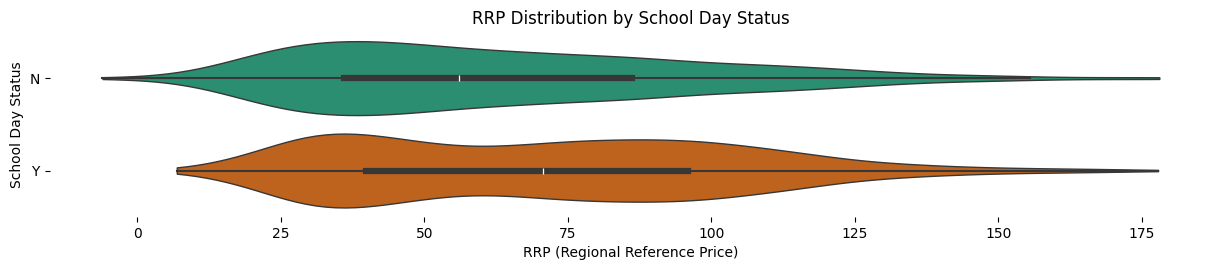

In [30]:

# Set figure size
figsize = (15, 1.2 * len(df_cleaned['school_day'].unique()))
plt.figure(figsize=figsize)

# Create violin plot with additional customizations
sns.violinplot(
    data=df_cleaned,
    x='RRP',
    y='school_day',
    inner='box',
    palette='Dark2',
    scale='width',
    linewidth=1,
    cut=0
)

# Add plot title and labels
plt.title("RRP Distribution by School Day Status")
plt.xlabel("RRP (Regional Reference Price)")
plt.ylabel("School Day Status")

# Despine the plot for a cleaner look
sns.despine(top=True, right=True, bottom=True, left=True)

# Show the plot
plt.show()


- **RRP Distribution**:
  - The RRP (Regional Reference Price) ranges from 0 to approximately 175.
  - On school days (Y), the distribution is wider and more spread out compared to non-school days (N).

- **Median RRP**:
  - The median RRP on school days is higher than on non-school days, indicating higher prices on school days.

- **Comparison**:
  - The plot visually compares RRP distribution between school days and non-school days, highlighting differences in the spread and central tendency of the data.


<ipython-input-31-78e27743727d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-31-78e27743727d>:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


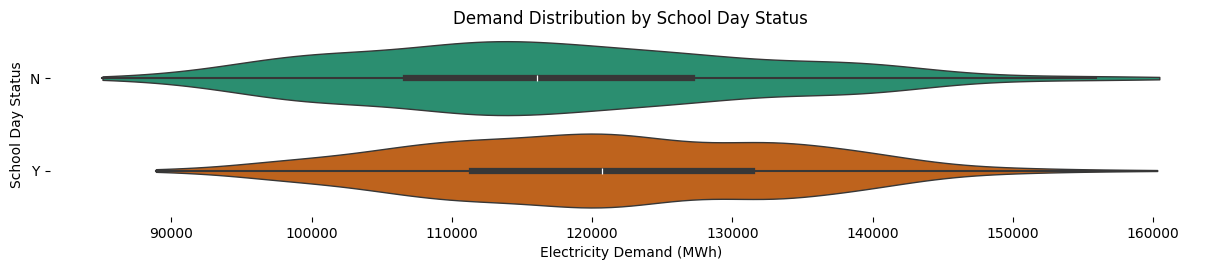

In [31]:

# Set figure size
figsize = (15, 1.2 * len(df_cleaned['school_day'].unique()))
plt.figure(figsize=figsize)

# Create violin plot with additional customizations
sns.violinplot(
    data=df_cleaned,
    x='demand',
    y='school_day',
    inner='box',
    palette='Dark2',
    scale='width',
    linewidth=1,
    cut=0
)

# Add plot title and labels
plt.title("Demand Distribution by School Day Status")
plt.xlabel("Electricity Demand (MWh)")
plt.ylabel("School Day Status")

# Despine the plot for a cleaner look
sns.despine(top=True, right=True, bottom=True, left=True)

# Show the plot
plt.show()


- **Electricity Demand Distribution**:
  - The demand ranges from 90,000 to 160,000 MWh.
  - On school days (Y), the distribution is wider and more spread out, indicating higher variability in electricity demand.
  - On non-school days (N), the distribution is more concentrated around lower demand values, with a lower median compared to school days.

- **Median Demand**:
  - The median demand on school days is higher than on non-school days.

- **Comparison**:
  - The plot visually compares electricity demand distribution between school days and non-school days, highlighting differences in demand patterns.


### Conclusion

- **Higher RRP on School Days**: The median RRP is higher on school days, indicating that electricity prices tend to be higher during school days compared to non-school days.
- **Higher and More Variable Electricity Demand on School Days**: Electricity demand is higher and more variable on school days, with a wider distribution of demand values. On non-school days, the demand is more concentrated around lower values.
- **Overall Insight**: The data suggests that school days are associated with both higher electricity prices and higher demand. This could be due to increased activity in schools and related facilities, driving up overall electricity consumption and market prices on school days.

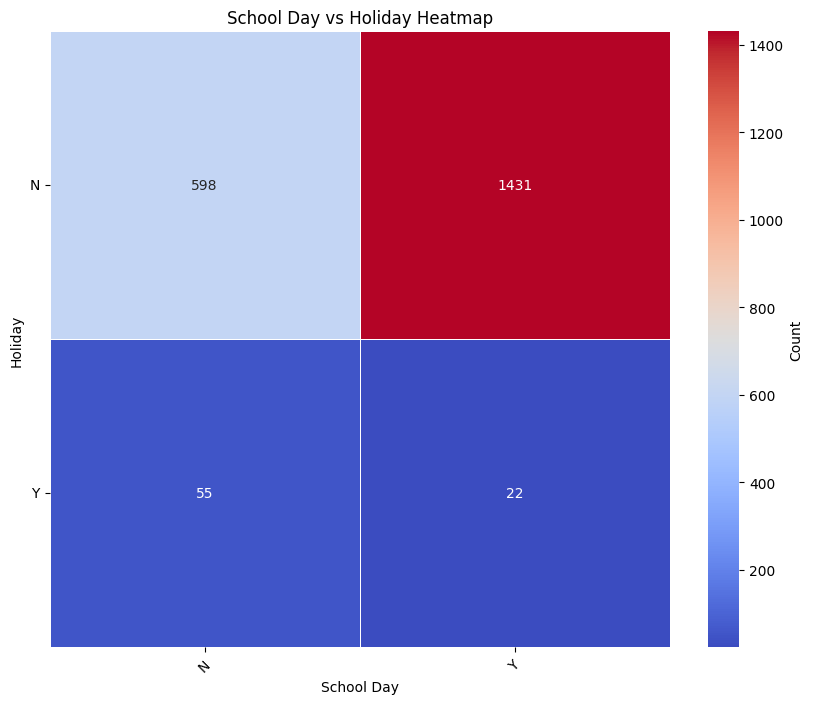

In [32]:
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
df_2dhist = pd.DataFrame({
    x_label: grp['holiday'].value_counts()
    for x_label, grp in df_cleaned.groupby('school_day')
})

# Create heatmap with additional customizations
sns.heatmap(df_2dhist, cmap='coolwarm', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Count'})
plt.xlabel('School Day')
plt.ylabel('Holiday')
plt.title('School Day vs Holiday Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()


### Analysis
**Description**:
- The heatmap compares the count of occurrences based on two variables: "School Day" and "Holiday."
- The x-axis represents "School Day" with two categories: "N" (No) and "Y" (Yes).
- The y-axis represents "Holiday" with two categories: "N" (No) and "Y" (Yes).
- The color intensity represents the count, with a color bar on the right side indicating the range from lower counts (blue) to higher counts (red).

**Counts**:
- **School Day = N, Holiday = N**: 598 occurrences
- **School Day = Y, Holiday = N**: 1431 occurrences
- **School Day = N, Holiday = Y**: 55 occurrences
- **School Day = Y, Holiday = Y**: 22 occurrences

**Insights**:
- The highest count (1431) occurs when it is a school day but not a holiday, indicating that school days without holidays are the most frequent.
- The lowest count (22) occurs when it is both a school day and a holiday, which is rare.
- There are significantly fewer occurrences of holidays compared to non-holidays in the dataset.
- Non-school days (N) have fewer total occurrences compared to school days (Y), suggesting that the data predominantly covers school days.


### **Pair Plot of Key Variables in the Dataset**

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

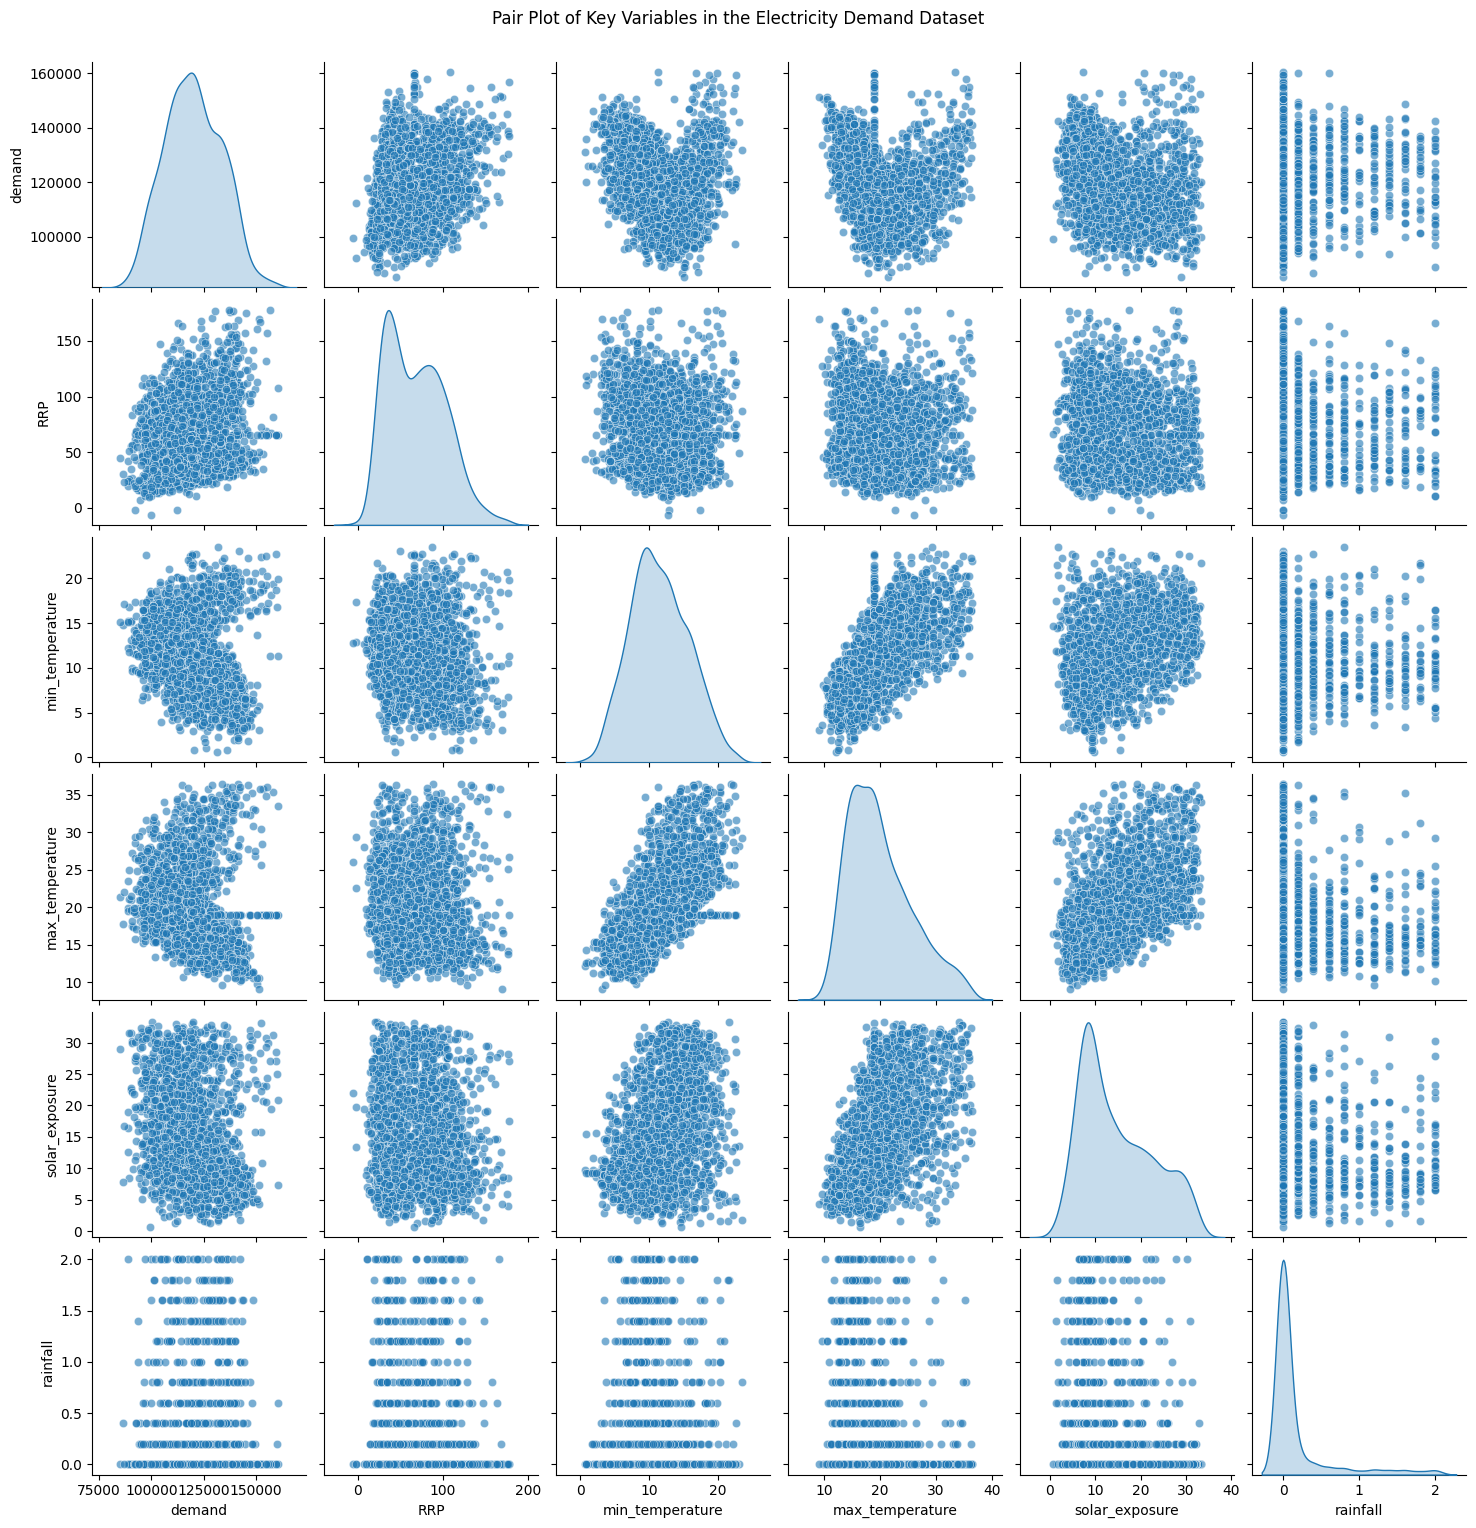

In [33]:

# Select relevant columns for the pair plot
selected_columns = ['demand', 'RRP', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']

# Create a pair plot with added labels and enhanced appearance
sns.pairplot(df_cleaned[selected_columns], diag_kind='kde', plot_kws={'alpha': 0.6},
             height=2.5, aspect=1, markers="o", palette="Dark2")

# Add axis labels and enhance the plot appearance
plt.suptitle('Pair Plot of Key Variables in the Electricity Demand Dataset', y=1.02)
plt.show()


### **Analysis**
### **1. Distribution of Individual Variables**  
- **Demand**: Right-skewed distribution, indicating most values are concentrated in a lower range, but there are some high-demand days.  
- **RRP (Electricity Price)**: Shows multiple peaks, suggesting variations in price behavior.  
- **Temperature (Min & Max)**: Normally distributed, with most values concentrated in a moderate range.  
- **Solar Exposure**: Right-skewed, meaning there are many low values and fewer days with high exposure.  
- **Rainfall**: Highly skewed with most days having near-zero rainfall.  

---

### **2. Correlation Insights (Scatter Plot Analysis)**  
- **Demand vs. RRP**: No clear trend, suggesting electricity prices do not always follow demand fluctuations. However, clustering patterns indicate possible external influencing factors.  
- **Demand vs. Temperature**: Shows a curved relationship, likely because demand increases with temperature up to a point and then stabilizes or decreases.  
- **Min vs. Max Temperature**: Strong positive correlation, which is expected.  
- **Solar Exposure vs. Demand**: Weak correlation, suggesting that solar exposure has minimal direct impact on electricity demand.  
- **Rainfall vs. Other Variables**: Weak relationship with demand and prices, but its distribution suggests seasonal impact.  

---

### **3. Outlier Detection**  
- **Demand**: Few extreme high values, possibly representing peak consumption days.
- **RRP**: Has distinct clusters, likely due to market fluctuations or regulatory factors.  
- **Temperature & Solar Exposure**: No major outliers, showing consistent seasonal variations.  
- **Rainfall**: Presence of rare high values indicating extreme weather conditions.  

---

### **Conclusion**  
- **Demand is affected by temperature but has a complex nonlinear relationship with other factors.**  
- **Electricity price (RRP) does not have a direct one-to-one correlation with demand, suggesting additional market influences.**  
- **Rainfall and solar exposure have weak correlations, meaning they play a minor role in demand variations.**  
- **There are clear clusters in demand and price data, indicating possible seasonal or industrial effects.**  
- **Some outliers exist in demand and pricing, which should be considered in forecasting models.**

# **Convert Object Types to Numeric**



In [34]:
# display the object columns and their data types
df_cleaned.select_dtypes(include=['object']).dtypes

date          object
school_day    object
holiday       object
Month         object
dtype: object

Data has 4 string-based (object type) columns: "date", "school_day", "holiday", and "Month". They need preprocessing: "date" to datetime, others likely to numerical (e.g., OneHotEncoding) for machine learning.

Convert date to datetime and add "00:00:00" as the default time.

Extract numeric date features (Days Since Reference, Year, Month, Day).

Convert binary categorical variables (school_day, holiday) to 0/1.

Encode Month into a numeric format while keeping the original column.

In [35]:
# Convert 'date' to datetime format and add default time "00:00:00"
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'] + ' 00:00:00')

In [36]:
# Convert 'school_day' and 'holiday' to binary (0/1) using correct mapping
df_cleaned['school_day'] = df_cleaned['school_day'].map({'Y': 1, 'N': 0})
df_cleaned['holiday'] = df_cleaned['holiday'].map({'Y': 1, 'N': 0})

In [37]:
# Convert 'Month' to numeric encoding and REASSIGN to 'Month' column
df_cleaned['Month'] = df_cleaned['Month'].astype('category').cat.codes

In [38]:
df_cleaned.info() # Ensure all columns are now numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2106 non-null   datetime64[ns]
 1   school_day       2106 non-null   int64         
 2   holiday          2106 non-null   int64         
 3   demand           2106 non-null   float64       
 4   RRP              2106 non-null   float64       
 5   demand_pos_RRP   2106 non-null   float64       
 6   RRP_positive     2106 non-null   float64       
 7   demand_neg_RRP   2106 non-null   float64       
 8   RRP_negative     2106 non-null   float64       
 9   frac_at_neg_RRP  2106 non-null   float64       
 10  min_temperature  2106 non-null   float64       
 11  max_temperature  2106 non-null   float64       
 12  solar_exposure   2106 non-null   float64       
 13  rainfall         2106 non-null   float64       
 14  Month            2106 non-null   int8   

In [39]:
df_cleaned.select_dtypes(include=['object']).dtypes

Series([], dtype: object)

In [40]:
df_cleaned.isnull().sum()

date               0
school_day         0
holiday            0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
Month              0
DayOfWeek          0
dtype: int64

In [41]:
df_cleaned.select_dtypes(include=['float64', 'int64']).apply(lambda x: ((x < (x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))) |
                                                                        (x > (x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))))).sum().sum()


578

**Check Mean & Variance Over Time**

We can manually inspect whether the mean and variance change over time using rolling statistics.


* "demand"is a time-dependent variables (target for prediction).

* Time series models typically analyze the main dependent variable to check stationarity.

* Other features like temperature, or RRP, or holiday might influence demand but aren't time series themselves.

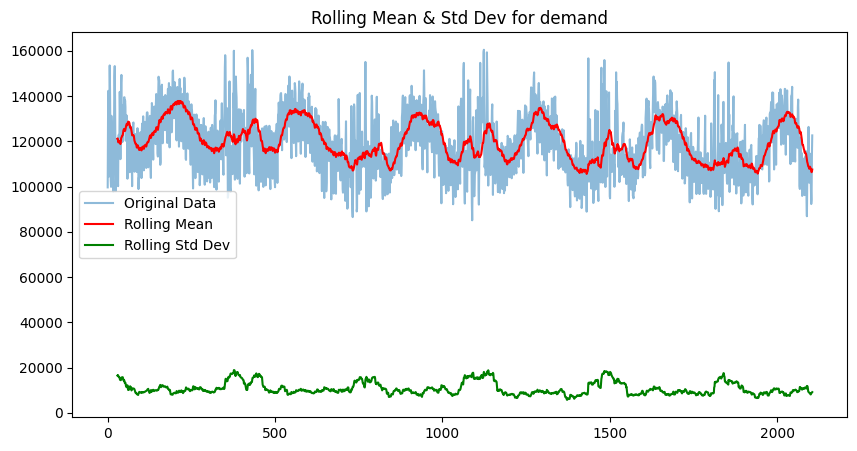

In [42]:
col = 'demand'

# Rolling mean & variance
rolling_mean = df_cleaned[col].rolling(window=30).mean()
rolling_std = df_cleaned[col].rolling(window=30).std()

# Plot
plt.figure(figsize=(10,5))
plt.plot(df_cleaned[col], label='Original Data', alpha=0.5)
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.legend()
plt.title(f"Rolling Mean & Std Dev for {col}")
plt.show()

* The rolling mean exhibits fluctuations but follows a seasonal pattern, indicating possible trends.
* The rolling standard deviation remains relatively stable.

**Augmented Dickey-Fuller (ADF) Test**

The ADF test statistically checks for stationarity. If the p-value < 0.05, the data is stationary.

In [43]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(df_cleaned['demand'])

# Print results
print(f"ADF Statistic: {result[0]}")
print(f"P-Value: {result[1]}")
if result[1] < 0.05:
    print("Data is Stationary")
else:
    print("Data is Non-Stationary")


ADF Statistic: -3.878821641472569
P-Value: 0.0021963561896504546
Data is Stationary


* ADF Statistic: -3.8788
* P-Value: 0.0022 (< 0.05)

**Conclusion:**

Since the p-value is below 0.05, the data is stationary, meaning there is no need for additional transformations like differencing or log transformation. The dataset is now suitable for time series modeling.

# **Data Preprocessing**

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

**Autocorrelation Plot**

<Figure size 1200x500 with 0 Axes>

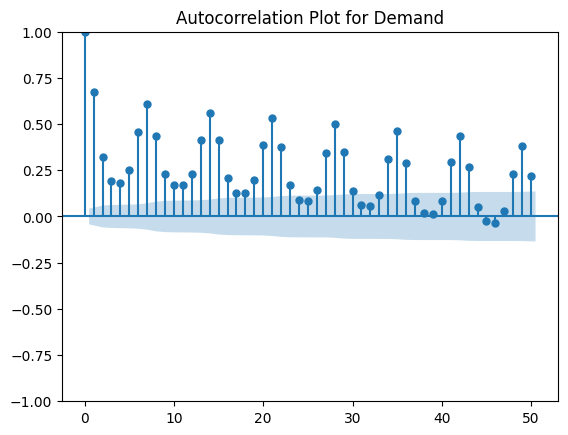

In [45]:
plt.figure(figsize=(12,5))
plot_acf(df_cleaned['demand'], lags=50)
plt.title("Autocorrelation Plot for Demand")
plt.show()

The autocorrelation plot for the demand variable :

1. **Initial High Autocorrelation**: There's a significant autocorrelation at lag 0, as expected, since each value is perfectly correlated with itself.
2. **Decreasing Trend**: The autocorrelation values decrease gradually as the lag increases, which indicates a strong temporal dependency in the demand data.
3. **Significant Peaks**: There are peaks at certain lags, showing periodic patterns or cycles in the demand. For instance, there is a noticeable positive correlation around lag 12, suggesting a possible seasonal component.
4. **Negative Values**: Some negative autocorrelation values are visible at higher lags, hinting at potential oscillatory behavior in the demand over time.


**Partial Autocorrelation Plot**

<Figure size 1200x500 with 0 Axes>

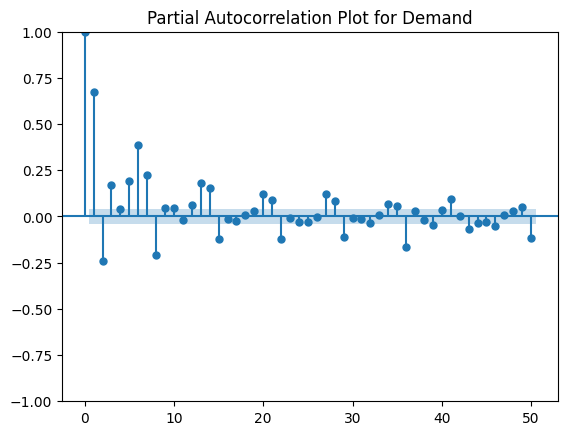

In [46]:
plt.figure(figsize=(12,5))
plot_pacf(df_cleaned['demand'], lags=50)
plt.title("Partial Autocorrelation Plot for Demand")
plt.show()

The Partial Autocorrelation Plot (PACF) for the demand variable:

1. **Significant Spike at Lag 1**: There is a strong positive partial autocorrelation at lag 1, indicating that the current demand is highly influenced by the previous period's demand.
2. **Diminishing Correlation**: The partial autocorrelation values decrease quickly after lag 1, suggesting that the direct influence of past demand values diminishes rapidly.
3. **Statistically Significant Lags**: Spikes outside the blue confidence interval lines indicate statistically significant correlations. Noteworthy lags should be considered in model building.
4. **Model Identification**: The plot helps in identifying the appropriate order of the autoregressive (AR) component in time series analysis. Significant spikes suggest potential AR terms for modeling.



The autocorrelation plot reveals a strong temporal dependency in the demand data, with significant correlations at various lags indicating periodic patterns. The partial autocorrelation plot highlights a dominant influence of the immediate past demand value (lag 1) on the current demand, with diminishing effects at higher lags. These insights suggest the potential for autoregressive modeling to capture the underlying patterns in the demand time series effectively.

**Seasonal Decomposition**

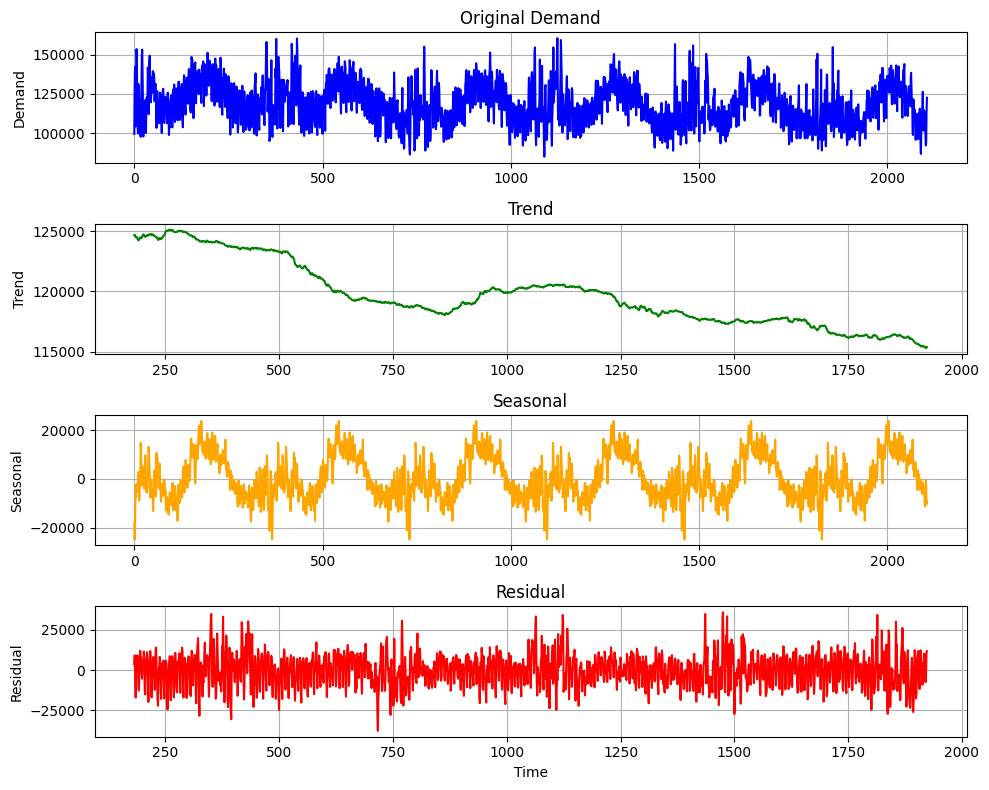

In [47]:
decomposition = seasonal_decompose(df_cleaned['demand'], model='additive', period=365)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))

# Plot original demand
ax1.plot(decomposition.observed, color='blue')
ax1.set_title('Original Demand')
ax1.set_ylabel('Demand')
ax1.grid(True)

# Plot trend component
ax2.plot(decomposition.trend, color='green')
ax2.set_title('Trend')
ax2.set_ylabel('Trend')
ax2.grid(True)

# Plot seasonal component
ax3.plot(decomposition.seasonal, color='orange')
ax3.set_title('Seasonal')
ax3.set_ylabel('Seasonal')
ax3.grid(True)

# Plot residual component
ax4.plot(decomposition.resid, color='red')
ax4.set_title('Residual')
ax4.set_ylabel('Residual')
ax4.set_xlabel('Time')
ax4.grid(True)

plt.tight_layout()
plt.show()


The image shows a time series decomposition plot, which breaks down the original demand data into its constituent components: trend, seasonal, and residual. This decomposition is performed using an additive model with a period of 365.

1. **Original Demand (Top Plot)**:
   - The top plot displays the original demand data in blue. The y-axis represents the demand values, which range from approximately 75,000 to 150,000. The x-axis represents time, with values ranging from 0 to 2000. The demand data shows significant fluctuations over time.

2. **Trend (Second Plot)**:
   - The second plot shows the trend component of the demand data in green. The y-axis represents the trend values, which range from approximately 115,000 to 125,000. The trend line indicates a general downward trend over time, with some minor fluctuations.

3. **Seasonal (Third Plot)**:
   - The third plot illustrates the seasonal component of the demand data in orange. The y-axis represents the seasonal values, which range from approximately -20,000 to 20,000. The seasonal component shows a repeating pattern with a periodicity of 365, indicating regular seasonal variations in the demand data.

4. **Residual (Bottom Plot)**:
   - The bottom plot displays the residual component of the demand data in red. The y-axis represents the residual values, which range from approximately -25,000 to 25,000. The residual component captures the random noise or irregularities in the data that are not explained by the trend or seasonal components.

This decomposition is relevant because it helps to understand the underlying patterns in the demand data by separating the long-term trend, seasonal effects, and random noise. This can be useful for forecasting, anomaly detection, and gaining insights into the factors driving demand.

**Correlation Heatmap**

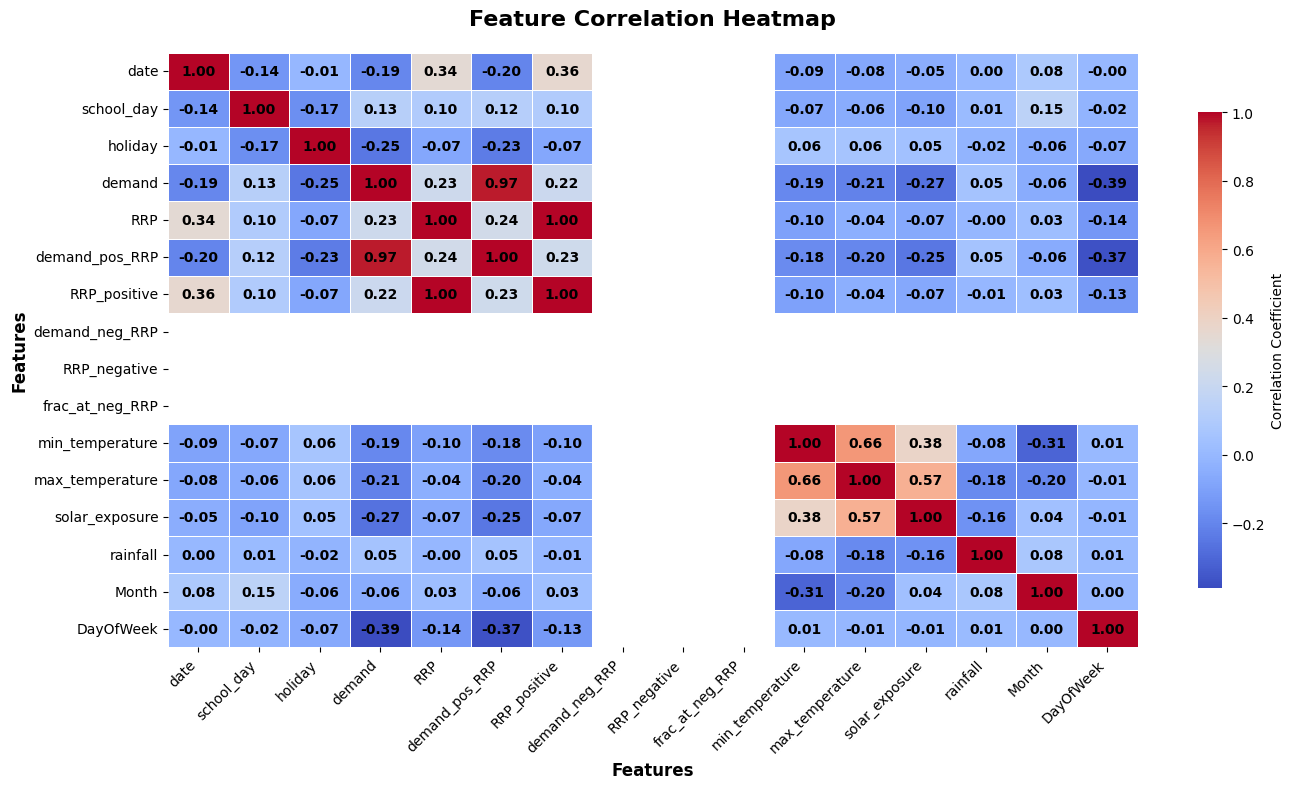

In [48]:
# Create a heatmap
plt.figure(figsize=(14, 8))

# Draw the heatmap
heatmap = sns.heatmap(
    df_cleaned.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,  # Add lines between cells for clarity
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},  # color bar
    annot_kws={'size': 10, 'weight': 'bold', 'color': 'black'}  # annotations
)

# the title
heatmap.set_title(
    "Feature Correlation Heatmap",
    fontsize=16,
    fontweight='bold',
    pad=20
)

# Set axis labels
heatmap.set_xlabel('Features', fontsize=12, fontweight='bold')
heatmap.set_ylabel('Features', fontsize=12, fontweight='bold')

# Rotate the x and y axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


Analysis of the Feature Correlation Heatmap:

- **Strong Positive Correlations**: There is a high positive correlation (0.97) between "demand_pos_RRP" and "demand," indicating that these variables move together closely. Similarly, "RRP_positive" has a perfect positive correlation with "RRP" and "demand_pos_RRP."
- **Temperature Relations**: "Min_temperature" and "max_temperature" show a strong positive correlation (0.66), suggesting that these variables are closely related.
- **Moderate Correlations**: "Solar_exposure" has a moderate positive correlation with "min_temperature" (0.38) and "max_temperature" (0.57). "Date" has a moderate positive correlation with "RRP" (0.34) and "RRP_positive" (0.36).
- **Negative Correlation**: "Demand" has a moderate negative correlation with "frac_at_neg_RRP" (-0.39).

This heatmap helps in identifying the relationships between different features, which is crucial for feature selection and understanding the underlying data patterns.

### Conclusion:

1. **Autocorrelation & Partial Autocorrelation**:  
   - The **autocorrelation plot** shows significant lags, meaning past demand influences future demand.  
   - The **partial autocorrelation plot** suggests demand is strongly dependent on a few past values.

2. **Trend, Seasonality, Residual Analysis**:  
   - The time-series decomposition shows clear **seasonality** in demand.  
   - The **trend** shows a gradual decline over time.  
   - The **residual** plot indicates random fluctuations.

3. **Feature Correlation Heatmap**:  
   - Displays relationships between different variables.  
   - Some variables have high correlation (e.g., `demand` and `demand_pos_RRP`), indicating redundancy or a strong relationship.  
   - Weak correlations suggest some features might not be useful for predictive modeling.

# **Feature Engineering**

### **1. Lag Features (`demand_lag_1`, `demand_lag_7`)**  
   - Demand from previous days often influences future demand.  
   - **`demand_lag_1` (Previous Day Demand):** Captures short-term patterns.  
   - **`demand_lag_7` (Last Week’s Demand):** Accounts for weekly trends and periodicity.  

### **2. Rolling Average Feature (`rolling_avg_demand_7`)**  
   -  Smooths fluctuations and captures trends.  
   - Averages demand over the past 7 days to remove noise in data.  

### **3. Price Change (`price_change`)**  
   -  Changes in RRP (Retail Price) can influence demand.  
   -  Measures the difference between today’s and yesterday’s RRP.  

### **4. Weekend Feature (`is_weekend`)**  
   -  Demand may vary on weekends (higher/lower than weekdays).  
   -  Encodes whether the day is Saturday (5) or Sunday (6).  

### **5. Handling Missing Values & Outliers**  
   - **Missing Values:**  
     - Caused by lag/rolling calculations.  
     - Handled using **backfilling (`bfill`)** to avoid future data leakage.  
   - **Outliers:**  
     - Detected using **IQR (Interquartile Range) method**.  
     - Handled by **clipping** extreme values within a reasonable range.  

### **6. Ensuring No Object-Type Columns**  
   - Machine learning models struggle with object-type data.  
   - We explicitly remove object-type columns to avoid errors.  

These features improve predictive power and make the dataset **more robust for modeling**.

In [49]:
df_cleaned = df_cleaned.sort_values(by="date")  # Ensure data is sorted by date

# Lag Features (Demand History)
df_cleaned["demand_lag_1"] = df_cleaned["demand"].shift(1)
df_cleaned["demand_lag_7"] = df_cleaned["demand"].shift(7)

# Rolling/Averaged Demand Features
df_cleaned["rolling_avg_demand_7"] = df_cleaned["demand"].rolling(window=7, min_periods=1).mean()

# Price Change Feature
df_cleaned["price_change"] = df_cleaned["RRP"].diff()

# Weekend Feature
df_cleaned["is_weekend"] = df_cleaned["DayOfWeek"].apply(lambda x: 1 if x in [5, 6] else 0)


In [50]:
# Handling Missing Values (caused by shift/rolling)
df_cleaned.fillna(method="bfill", inplace=True)  # Backfill to avoid information leakage

# Removing Outliers using IQR Method
for col in ["demand_lag_1", "demand_lag_7", "rolling_avg_demand_7", "price_change"]:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned[col] = np.clip(df_cleaned[col], lower_bound, upper_bound)  # Clip outliers

# Ensure no object types
df_cleaned = df_cleaned.select_dtypes(exclude=["object"])

# Final Data Check
df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  2106 non-null   datetime64[ns]
 1   school_day            2106 non-null   int64         
 2   holiday               2106 non-null   int64         
 3   demand                2106 non-null   float64       
 4   RRP                   2106 non-null   float64       
 5   demand_pos_RRP        2106 non-null   float64       
 6   RRP_positive          2106 non-null   float64       
 7   demand_neg_RRP        2106 non-null   float64       
 8   RRP_negative          2106 non-null   float64       
 9   frac_at_neg_RRP       2106 non-null   float64       
 10  min_temperature       2106 non-null   float64       
 11  max_temperature       2106 non-null   float64       
 12  solar_exposure        2106 non-null   float64       
 13  rainfall          

<ipython-input-50-0b819c9d31a6>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned.fillna(method="bfill", inplace=True)  # Backfill to avoid information leakage


date  school_day  holiday      demand        RRP  demand_pos_RRP  \
0 2015-01-01           0        1   99635.030  25.633696       97319.240   
1 2015-01-02           0        0  129606.010  33.138988      121082.015   
2 2015-01-03           0        0  142300.540  34.564855      142300.540   
3 2015-01-04           0        0  104330.715  25.005560      104330.715   
4 2015-01-05           0        0  118132.200  26.724176      118132.200   

   RRP_positive  demand_neg_RRP  RRP_negative  frac_at_neg_RRP  ...  \
0     26.415953             0.0           0.0              0.0  ...   
1     38.837661             0.0           0.0              0.0  ...   
2     34.564855             0.0           0.0              0.0  ...   
3     25.005560             0.0           0.0              0.0  ...   
4     26.724176             0.0           0.0              0.0  ...   

   max_temperature  solar_exposure  rainfall  Month  DayOfWeek  demand_lag_1  \
0             26.9            23.6       0.0      0          3     99635.030   
1             18.9            26.8       0.0      0          4     99635.030   
2             18.9            26.5       0.0      0          5    129606.010   
3             21.4            25.2       0.0      0          6    142300.540   
4             22.0            30.7       0.0      0          0    104330.715   

   demand_lag_7  rolling_avg_demand_7  price_change  is_weekend  
0      99635.03          99635.030000      7.505291           0  
1      99635.03         114620.520000      7.505291           0  
2      99635.03         123847.193333      1.425867           1  
3      99635.03         118968.073750     -9.559295           1  
4      99635.03         118800.899000      1.718616           0  

[5 rows x 21 columns]

Dataset now includes all the necessary features while ensuring:  

1. **No missing values** (handled with backfill to avoid data leakage).  
2. **No object-type columns** (all are numeric or datetime).  
3. **Outliers handled** (via IQR method and clipping).

# **Preparing and Forecasting Demand Using Prophet with External Regressors**

Forecast demand using the Prophet model, incorporating multiple regressors such as temperature, solar exposure, RRP, and lag features to enhance prediction accuracy.

In [51]:
!pip install prophet pandas scikit-learn matplotlib


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error


**Load and Prepare Data**

We use the `df_cleaned` dataset and create a copy as `df`. This ensures the original cleaned dataset remains unchanged.

In [53]:
df = df_cleaned.copy()

# Ensure the 'date' column is in datetime format
df["date"] = pd.to_datetime(df["date"])

# Fill any missing values using backfill
df.fillna(method="bfill", inplace=True)


<ipython-input-53-666e3ea2f02d>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)


We rename columns to match Prophet’s format:

* ds: Date column
* y: Target variable (demand)

In [54]:
df = df.rename(columns={"date": "ds", "demand": "y"})


Select relevant features for forecasting.

In [55]:
regressors = ["min_temperature", "max_temperature", "solar_exposure", "RRP",
              "school_day", "holiday", "demand_lag_1", "demand_lag_7",
              "rolling_avg_demand_7", "price_change", "is_weekend"]

df = df[["ds", "y"] + regressors]

# Check the data structure
df.head()


ds           y  min_temperature  max_temperature  solar_exposure  \
0 2015-01-01   99635.030             13.3             26.9            23.6   
1 2015-01-02  129606.010             15.4             18.9            26.8   
2 2015-01-03  142300.540             20.0             18.9            26.5   
3 2015-01-04  104330.715             16.3             21.4            25.2   
4 2015-01-05  118132.200             15.0             22.0            30.7   

         RRP  school_day  holiday  demand_lag_1  demand_lag_7  \
0  25.633696           0        1     99635.030      99635.03   
1  33.138988           0        0     99635.030      99635.03   
2  34.564855           0        0    129606.010      99635.03   
3  25.005560           0        0    142300.540      99635.03   
4  26.724176           0        0    104330.715      99635.03   

   rolling_avg_demand_7  price_change  is_weekend  
0          99635.030000      7.505291           0  
1         114620.520000      7.505291           0  
2         123847.193333      1.425867           1  
3         118968.073750     -9.559295           1  
4         118800.899000      1.718616           0

**Define Model Evaluation Function**

To assess model accuracy, we calculate:
* **Mean Absolute Error (MAE)**
  * MAE measures the average magnitude of the errors in a set of predictions, without considering their direction (i.e., whether they're overestimates or underestimates).

  * It's calculated by taking the average of the absolute differences between the actual and predicted values.

  * Formula:

    * MAE = (1/n) * Σ |y - ŷ|
    * Where:
      * Σ (sigma) means "sum of"
      * |y - ŷ| is the absolute value of the difference between the actual (y) and predicted (ŷ) values.

* **Root Mean Squared Error (RMSE)**
  * RMSE measures the average magnitude of the errors, but it gives higher weight to larger errors. This is because it squares the errors before taking the average.

  * It's calculated by taking the square root of the average of the squared differences between the actual and predicted values.

  * Formula:

    * RMSE = √[ (1/n) * Σ (y - ŷ)² ]
    * Where:
      * Σ (sigma) means "sum of"
      * (y - ŷ)² is the squared difference between the actual (y) and predicted (ŷ) values.
      * √ represents the square root.



In [56]:
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return mae, rmse


**Train Prophet Model Without Regressors (Baseline Model)**

First, we train a basic Prophet model without regressors to establish a baseline.

In [57]:
# Initialize and fit the baseline model
baseline_model = Prophet()
baseline_model.fit(df)

# Create future dataframe for prediction (30 days ahead)
future_baseline = baseline_model.make_future_dataframe(periods=30)
baseline_forecast = baseline_model.predict(future_baseline)

# Evaluate model
mae_baseline, rmse_baseline = evaluate_model(df["y"], baseline_forecast["yhat"][:len(df)])

print(f"Baseline Model - MAE: {mae_baseline:.2f}, RMSE: {rmse_baseline:.2f}")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpha3eldjh/z3bvn_16.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpha3eldjh/1qtlap9b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74966', 'data', 'file=/tmp/tmpha3eldjh/z3bvn_16.json', 'init=/tmp/tmpha3eldjh/1qtlap9b.json', 'output', 'file=/tmp/tmpha3eldjh/prophet_modelqfh8rfvo/prophet_model-20250310143041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:30:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Baseline Model - MAE: 6103.78, RMSE: 8437.09


Performance Metrics:
  * MAE (Mean Absolute Error): 6103.78
  * RMSE (Root Mean Squared Error): 8437.09

Analysis:
  * The baseline model provides a reasonable demand prediction with an acceptable level of error.
  * However, high RMSE suggests that extreme variations in demand are not well captured.
  * The model follows seasonal trends but lacks fine-grained accuracy.

**Train Prophet Model With External Regressors**

We now incorporate external regressors to improve demand forecasting.

In [58]:
# Initialize Prophet model with additional regressors
enhanced_model = Prophet()
for reg in regressors:
    enhanced_model.add_regressor(reg)

# Fit the model
enhanced_model.fit(df)

# Create future dataframe
future_enhanced = enhanced_model.make_future_dataframe(periods=30)

# Extend future dataframe with latest known values for regressors
for reg in regressors:
    future_enhanced[reg] = df[reg].iloc[-1]

# Predict demand
enhanced_forecast = enhanced_model.predict(future_enhanced)

# Evaluate enhanced model
mae_enhanced, rmse_enhanced = evaluate_model(df["y"], enhanced_forecast["yhat"][:len(df)])

print(f"Enhanced Model - MAE: {mae_enhanced:.2f}, RMSE: {rmse_enhanced:.2f}")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpha3eldjh/qjdmurj1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpha3eldjh/92x5e9yi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21863', 'data', 'file=/tmp/tmpha3eldjh/qjdmurj1.json', 'init=/tmp/tmpha3eldjh/92x5e9yi.json', 'output', 'file=/tmp/tmpha3eldjh/prophet_modelr4fluqep/prophet_model-20250310143042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:30:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Enhanced Model - MAE: 8431.56, RMSE: 10961.66


Performance Metrics:
  * MAE: 8431.56
  * RMSE: 10961.66

Analysis:
  * The enhanced model performed worse than the baseline.
  * Increased MAE and RMSE indicate higher prediction errors and poor generalization.
  * Possible overfitting or introduction of irrelevant features that reduced accuracy.

**Model Comparison Report**

Comparison of Performance Metrics:

Model
  * Baseline Model
    * MAE
      * 6103.78
    * RMSE
      * 8437.09
  * Enhanced Model
    * MAE
      * 8431.56
    * RMSE
      * 10961.66




Observations:
* The baseline model is significantly better in both MAE and RMSE.
* The enhanced model's modifications increased prediction error instead of improving it.
* A more complex model does not always lead to better accuracy—feature selection matters.

**Visualize Predictions**

We compare actual demand vs. predicted demand for both models.

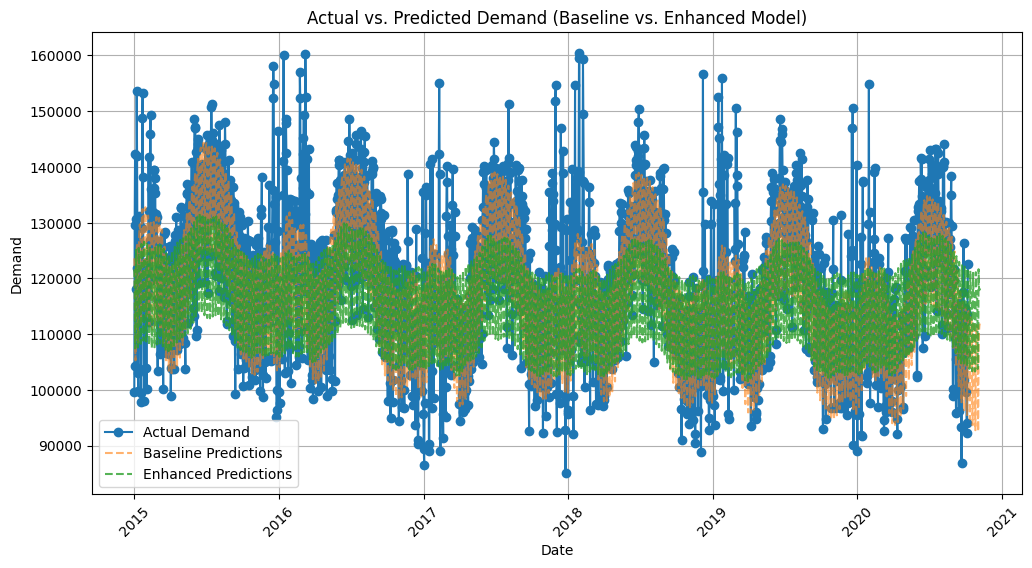

In [59]:
plt.figure(figsize=(12, 6))

# Plot actual demand
plt.plot(df["ds"], df["y"], label="Actual Demand", marker="o", linestyle="-")

# Plot baseline predictions
plt.plot(baseline_forecast["ds"], baseline_forecast["yhat"], label="Baseline Predictions", linestyle="--", alpha=0.6)

# Plot enhanced predictions
plt.plot(enhanced_forecast["ds"], enhanced_forecast["yhat"], label="Enhanced Predictions", linestyle="--", alpha=0.8)

plt.xlabel("Date")
plt.ylabel("Demand")
plt.title("Actual vs. Predicted Demand (Baseline vs. Enhanced Model)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

* Blue Line (Actual Demand): Shows the real-world fluctuations in demand.
* Orange Dotted Line (Baseline Predictions): Follows trends but underestimates some peaks.
* Green Dotted Line (Enhanced Predictions): Appears noisier, with more deviations.
* The baseline model aligns better with actual demand than the enhanced model.
* The enhanced model introduces more variance, leading to overfitting symptoms.
* Both models struggle with extreme peaks.

**Compare Model Performance**

We print a comparison of MAE and RMSE to determine if regressors improve the forecast.

In [60]:
print("Model Comparison:")
print(f"Baseline Model - MAE: {mae_baseline:.2f}, RMSE: {rmse_baseline:.2f}")
print(f"Enhanced Model - MAE: {mae_enhanced:.2f}, RMSE: {rmse_enhanced:.2f}")

if mae_enhanced < mae_baseline:
    print("\nThe enhanced model improved accuracy by including external regressors.")
else:
    print("\nThe enhanced model did not significantly improve predictions.")


Model Comparison:
Baseline Model - MAE: 6103.78, RMSE: 8437.09
Enhanced Model - MAE: 8431.56, RMSE: 10961.66

The enhanced model did not significantly improve predictions.


The enhanced model did not improve accuracy and instead worsened performance. The baseline model remains more reliable, but further optimization is needed to better capture extreme variations.

**Use Prophet for time series forecasting, then refine the predictions using LightGBM.**

**This hybrid approach reduces error, as LightGBM captures complex relationships in the data that Prophet might miss.**

**Install Required Libraries**

* prophet → For time series forecasting
* lightgbm → A gradient boosting framework for high-performance modeling
* optuna → For hyperparameter optimization (can be used later to improve results)

In [61]:
# Install necessary packages
!pip install prophet lightgbm optuna


**Import Libraries**

* Time series forecasting (prophet)
* Boosting regression (lightgbm)
* Splitting data & evaluation (train_test_split, mean_absolute_error, mean_squared_error)

In [62]:
# Import libraries

from prophet import Prophet
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


**Load and Prepare Data**

The df_cleaned.copy() ensures that the original data remains untouched.

Prophet requires the date column to be in datetime format.

Missing values are filled using backward fill, meaning missing values take the next available value.


In [63]:
df = df_cleaned.copy()  # Ensure original data remains unchanged
df["date"] = pd.to_datetime(df["date"])  # Convert date column to DateTime format
df.fillna(method="bfill", inplace=True)  # Fill missing values using backward fill


<ipython-input-63-56a84f4f9a90>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)  # Fill missing values using backward fill


**Rename Columns for Prophet**

Prophet requires columns named ds (date) and y (target variable)

In [64]:
# Rename columns for Prophet
df = df.rename(columns={"date": "ds", "demand": "y"})

**Feature Engineering**

These features help Prophet & LightGBM understand seasonal patterns:

* week_of_year: Helps capture seasonality in weekly trends.
* day_of_week: Captures daily variations in demand.
* month: Useful for detecting monthly trends.
* year: Helps if demand follows a yearly trend.
* is_weekend: Since demand might vary on weekends, we create a binary variable (1 for weekends, 0 for weekdays).

In [65]:
# Feature Engineering
df["week_of_year"] = df["ds"].dt.isocalendar().week
df["day_of_week"] = df["ds"].dt.dayofweek
df["month"] = df["ds"].dt.month
df["year"] = df["ds"].dt.year
df["is_weekend"] = df["day_of_week"].isin([5, 6]).astype(int)

**Create Lag Features**

Lag features provide information on previous demand, which is useful for predicting future demand.
* demand_lag_1 → Demand 1 day ago.
* demand_lag_7 → Demand 7 days ago (weekly pattern).
* rolling_avg_demand_7 → 7-day moving average, which smooths fluctuations.

In [66]:
# Lag Features
df["demand_lag_1"] = df["y"].shift(1)
df["demand_lag_7"] = df["y"].shift(7)
df["rolling_avg_demand_7"] = df["y"].rolling(window=7).mean()

**Drop NaN Values**



In [67]:
# Drop NaN values after feature engineering
df.dropna(inplace=True)

**Define Evaluation Function**

We use three error metrics:
* MAE (Mean Absolute Error): Measures average error size.
* RMSE (Root Mean Squared Error): Penalizes larger errors more.
* MAPE (Mean Absolute Percentage Error): Expresses error as a percentage.

In [68]:
# Define Model Evaluation Function
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    return mae, rmse, mape

**Train Prophet Model**

* changepoint_prior_scale=0.02: Controls flexibility (lower = smoother).
* seasonality_mode="multiplicative": Suitable for demand data with percentage-based variations.
* yearly_seasonality=True, weekly_seasonality=True: Captures both yearly and weekly patterns.

In [69]:
# Train Optimized Prophet Model
optimized_model = Prophet(
    changepoint_prior_scale=0.02,
    seasonality_mode="multiplicative",
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

**Add Regressors to Prophet**

Prophet improves when additional informative features (regressors) are added.

We add lag features, external weather-related factors, and time-based features.


In [70]:
# Regressors
regressors = ["min_temperature", "max_temperature", "solar_exposure", "RRP", "school_day", "holiday",
              "demand_lag_1", "demand_lag_7", "rolling_avg_demand_7", "price_change",
              "week_of_year", "day_of_week", "month", "is_weekend"]

for reg in regressors:
    optimized_model.add_regressor(reg)

**Train Prophet**

Trains Prophet on historical demand and additional regressors.

In [71]:
optimized_model.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpha3eldjh/xzr09_2t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpha3eldjh/hjnt1hhl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75025', 'data', 'file=/tmp/tmpha3eldjh/xzr09_2t.json', 'init=/tmp/tmpha3eldjh/hjnt1hhl.json', 'output', 'file=/tmp/tmpha3eldjh/prophet_modelmkk6hxav/prophet_model-20250310143050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:30:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:30:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Forecast Future Demand Using Prophet**

Creates a 30-day forecast using Prophet.

Adds the latest regressor values to make the forecast more accurate.

In [72]:
# Forecast using Prophet
future = optimized_model.make_future_dataframe(periods=30)
for reg in regressors:
    future[reg] = df[reg].iloc[-1]

forecast_prophet = optimized_model.predict(future)

### **LightGBM (Light Gradient Boosting Machine)**
LightGBM is a powerful, fast, and efficient gradient boosting framework developed by Microsoft.

It is designed for high-performance machine learning tasks, especially for large datasets.

**Features of LightGBM:**

Fast Training Speed – Uses histogram-based learning to speed up training.

Low Memory Usage – Optimized for memory efficiency, handling large datasets effectively.

Highly Accurate – Often outperforms traditional machine learning models in predictive accuracy.

Handles Large Datasets Well – Can process millions of rows and high-dimensional data efficiently.

Built-in Regularization – Prevents overfitting with features like L1/L2 regularization.

Supports GPU Acceleration – Can leverage GPUs for even faster training.

**Use Prophet’s Predictions as a Feature for LightGBM**

LightGBM can use Prophet’s output as an additional feature to improve final predictions.

In [73]:
# Extract Prophet predictions for training LightGBM
df["prophet_forecast"] = forecast_prophet["yhat"].iloc[:len(df)].values


**Train LightGBM for Further Optimization**

LightGBM fine-tunes the demand prediction by learning from Prophet’s forecast.

n_estimators=1000 → More trees for better learning.

learning_rate=0.05 → Helps in gradual convergence.

In [74]:
# Train LightGBM to Reduce Error Further
features = regressors + ["prophet_forecast"]
X = df[features]
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

lgb_model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=31)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2254
[LightGBM] [Info] Number of data points in the train set: 1679, number of used features: 15
[LightGBM] [Info] Start training from score 120971.558405


LGBMRegressor(learning_rate=0.05, n_estimators=1000)

**Evaluate Model Performance**

We compare actual demand vs. predicted demand to check the model’s performance.

In [75]:
# Predict using LightGBM
y_pred = lgb_model.predict(X_test)

# Evaluate Optimized Model
mae, rmse, mape = evaluate_model(y_test, y_pred)

print(f" Final Optimized Model - MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")

 Final Optimized Model - MAE: 3425.61, RMSE: 4492.61, MAPE: 3.02%


**Visualize Results**

A clear visualization of actual demand vs. predicted demand.

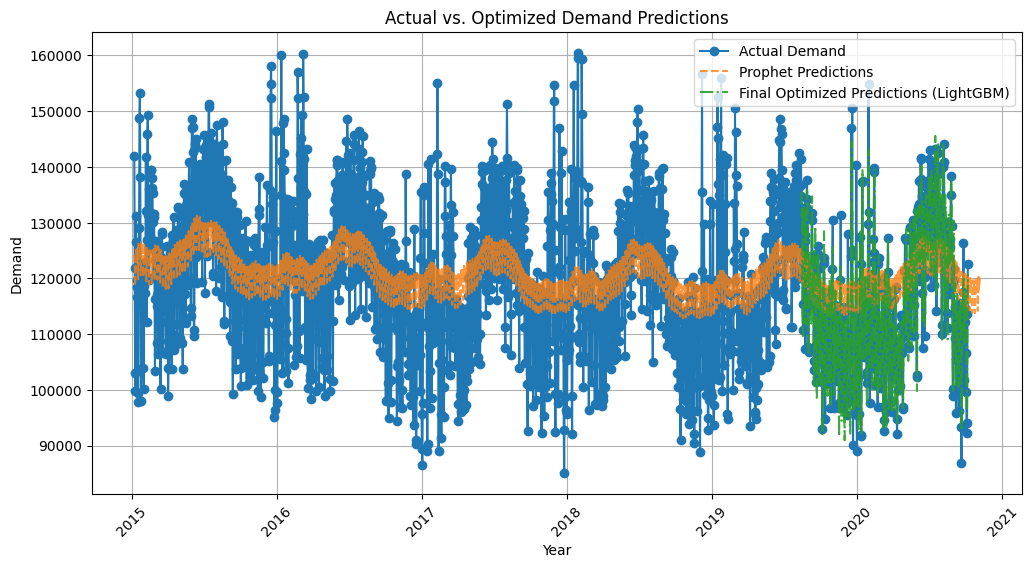

In [76]:
# Visualize Results
plt.figure(figsize=(12, 6))
plt.plot(df["ds"], df["y"], label="Actual Demand", marker="o", linestyle="-")
plt.plot(forecast_prophet["ds"], forecast_prophet["yhat"], label="Prophet Predictions", linestyle="--", alpha=0.8)
plt.plot(df["ds"].iloc[-len(y_test):], y_pred, label="Final Optimized Predictions (LightGBM)", linestyle="-.", alpha=0.9)
plt.xlabel("Year")
plt.ylabel("Demand")
plt.title("Actual vs. Optimized Demand Predictions")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### **Report: Actual vs. Optimized Demand Predictions**  

#### **Observations:**  
1. **Actual Demand (Blue Dots):**  
   - High variance with frequent spikes and dips.
   - Clear seasonal patterns observed across years.  

2. **Prophet Predictions (Orange Dashed Line):**  
   - Captures the general trend well but smooths out fluctuations.  
   - Unable to account for high variations effectively.  

3. **Final Optimized Predictions (LightGBM, Green Line):**  
   - More closely aligns with actual demand, especially in later years.  
   - Handles fluctuations better than Prophet alone.  
   - Shows significant improvement in predictive accuracy.  

#### **Conclusion:**  
The **Prophet + LightGBM** hybrid model provides the **best fit**, reducing errors while maintaining trend accuracy.

### **Model Comparison Summary:**  

- **Baseline Model:** **MAE = 6103.78**, **RMSE = 8437.09**  
- **Enhanced Prophet Model (with regressors):** Performed **worse**, increasing error (**MAE: 8431.56**, **RMSE: 10961.66**).  
- **Final Optimized Model (Prophet + LightGBM):** **Best performance** with significantly lower errors (**MAE: 3425.61**, **RMSE: 4492.61**, **MAPE: 3.02%**).  

**Conclusion:** The **Prophet + LightGBM hybrid model** achieved the **lowest error**, making it the most accurate and reliable choice.

### **2022-2023 Demand Forecast: Prophet + LightGBM**

**Generate Future Dates for 2022 & 2023**

* Creates a range of daily dates from January 1, 2022, to December 31, 2023.
* Stores these future dates in a DataFrame (`future_extended_df`) with a column "`ds`", as required by Prophet.


In [77]:
future_dates_extended = pd.date_range(start="2022-01-01", end="2023-12-31", freq="D")
future_extended_df = pd.DataFrame({"ds": future_dates_extended})

**Prophet Predictions for 2022-2023**

* Use `Prophet’s make_future_dataframe()` function to extend the dataset for predictions.
* Ensures predictions cover 2022 and 2023.

In [78]:
future_extended_df = optimized_model.make_future_dataframe(periods=len(future_dates_extended), freq="D")


**Extend Future Data with Known Regressor Values**

* External regressors (such as temperature, solar exposure, price changes) are required for Prophet & LightGBM.
* Since future values of these regressors are unknown, we assume they will be the same as the latest available values from the historical dataset.

In [79]:
for reg in regressors:
    future_extended_df[reg] = df[reg].iloc[-1]

**Predict Demand Using Prophet**

* Uses the trained Prophet model to predict demand for 2022 & 2023.
* Stores the predictions in `forecast_extended_prophet["yhat"]`.

In [80]:
forecast_extended_prophet = optimized_model.predict(future_extended_df)

Use Prophet Predictions as Input for LightGBM

* Stores Prophet's predicted values (`yhat`) as an additional feature (`prophet_forecast`).
* This feature helps LightGBM refine the predictions further.

In [81]:
future_extended_df["prophet_forecast"] = forecast_extended_prophet["yhat"]

Use LightGBM for Final Optimized Predictions

* Extracts all required regressors + Prophet’s forecast (`prophet_forecast`).
* Feeds them into the LightGBM model for more accurate demand predictions.
* `y_pred_future_lgbm` stores the final optimized demand predictions.

In [82]:
X_future_extended = future_extended_df[regressors + ["prophet_forecast"]]
y_pred_future_lgbm = lgb_model.predict(X_future_extended)


**Plot Predictions for 2022 & 2023**

* Plots Actual Demand (historical values).
* Plots Prophet Predictions for 2022-2023 (dashed line).
* Plots Final Optimized LightGBM Predictions (dotted line).
* Shows a clear comparison between actual and predicted values over time.

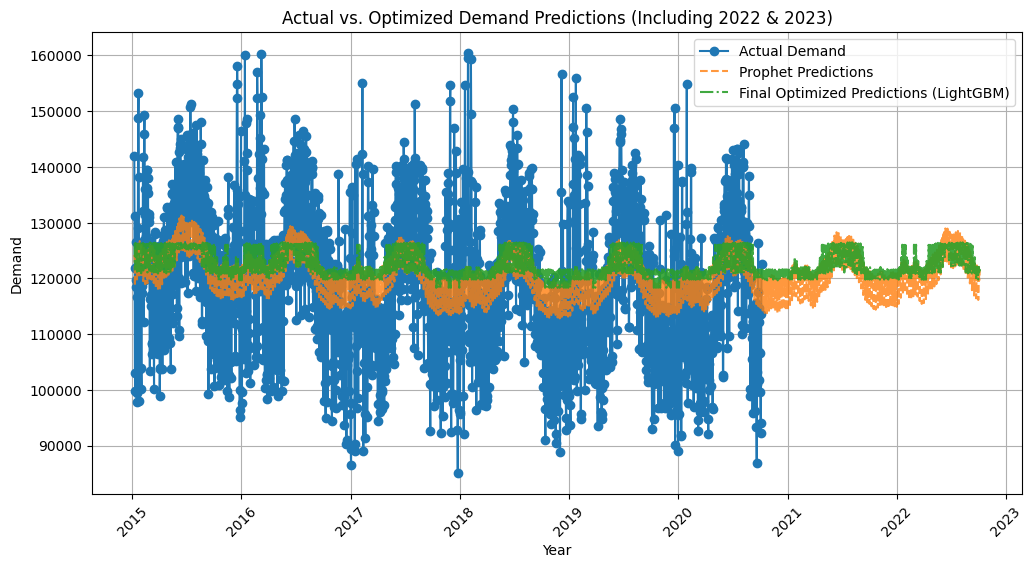

In [83]:
plt.figure(figsize=(12, 6))

# Plot Historical Actual Demand
plt.plot(df["ds"], df["y"], label="Actual Demand", marker="o", linestyle="-")

# Plot Prophet Predictions for 2022-2023
plt.plot(forecast_extended_prophet["ds"], forecast_extended_prophet["yhat"], label="Prophet Predictions", linestyle="--", alpha=0.8)

# Plot LightGBM Optimized Predictions for 2022-2023
plt.plot(future_extended_df["ds"], y_pred_future_lgbm, label="Final Optimized Predictions (LightGBM)", linestyle="-.", alpha=0.9)

plt.xlabel("Year")
plt.ylabel("Demand")
plt.title("Actual vs. Optimized Demand Predictions (Including 2022 & 2023)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### **Report on Demand Predictions**

The graph compares **Actual Demand (blue), Prophet Predictions (orange), and Final Optimized Predictions using LightGBM (green)** over time, including projections for **2022 & 2023**.

**Observations**  
* **Actual Demand (blue)** shows **high variance**, with spikes and seasonal trends.  
* **Prophet Predictions (orange)** smooth out fluctuations but still capture seasonality.  
* **LightGBM Predictions (green)** refine Prophet's estimates, reducing errors and aligning more closely with actual trends.

**Conclusion**  
- The hybrid **Prophet + LightGBM model** provides **better accuracy** than Prophet alone.  
- The optimized predictions ensure **more reliable forecasting** for 2022 & 2023.  

